# Analysis of Cepheid Variables
**Student id: 2653059C**


In [110]:
#first import libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as plt
import matplotlib.image as mping
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy.optimize
import os
from scipy.signal import find_peaks

## Aims

The aim of this experiment is to prove the Period-Luminosity Law by analysing apparent magnitude readings of Cepheid Variable stars. The analysis that is to be done consists of the following; 

1. Using power spectrum analysis the period is determined.
2. Determine the least square fitting of each period and extract the best-fitted period. 
3. Establish the Period-Luminosity Law, and correct for extinction factors. 

The Period-Luminosity Law is as follows; 

\begin{align}
log_{10}\left(\frac{\bar{L}}{L_{solar}}\right) = alog_{10}P+b
\end{align}

This can also be written in terms of absolute magnitude $M_V$, which is the linear relation that will be proven in the lab;

\begin{align}
\bar{M_V} = Alog_{10}P+B
\end{align}


## Equipment 

In this experiment I have been given the following resources:

1. 18 Cepheid Variable star data set 
   - These individual '.dat' files provide the bases for the data used. Each data file comes with 4 columns; time of observation (Julian Dates), apparent magnitude of the visual band (V) (uncertaitny of $\pm 0.16$), U-B and B-V colour indexes. Note, that only the first two columns are used throughout the lab. 
2. 'Analysis of Cepheid Variables, Astronomy 2 Lab Script 2022-23' by University of Glasgow School of Physics and Astronomy
    - Some code is provided in the lab script this is to be used mainly in Task 1.
3. Table 1, ('Analysis of Cepheid Variables, Astronomy 2 Lab Script 2022-23' by University of Glasgow School of Physics and Astronomy)
   - This provides data for the thrid and final task when plotting the Period-Luminosity Law. It denotes the distance to each star in parsecs (pc) and the colour excess ($E_{B-V}$) of each star.


## Task 1 - Find Periods Candidates using the Power Spectrum

With this first task, the time-magnitude data is plotted then analysed with the power spectrum. This is the first technique for measuring the period. The power spectrum works as a Fourier series. This function inspects a wide range of periods, however it can give false values (aliases).

The task is first to be completed on one star, then extrapolated for all 18 data sets.

To begin the first two columns of the first data set ('AN_Aur_p.dat') must be loaded in;


### Single Star

In [111]:
mverror = 0.16

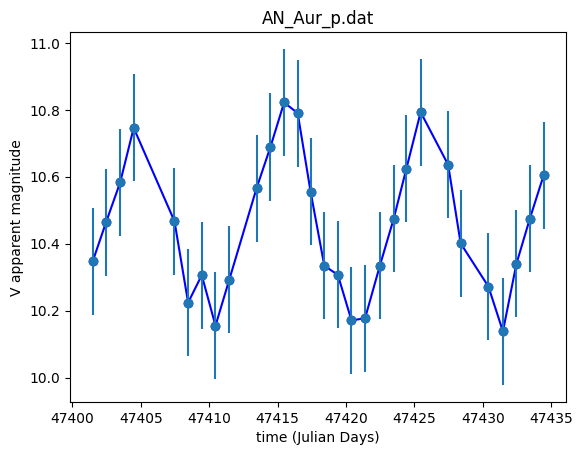

In [112]:
mdir = "data_files/"
time , v_magnitudes = np . loadtxt ( mdir +"/AN_Aur_p.dat",
unpack = True , usecols =[0 ,1])
plt.figure()
plt.plot(time , v_magnitudes , 'o-' , color = 'blue')
plt.errorbar(time , v_magnitudes, yerr = mverror, fmt='o')
plt.title("AN_Aur_p.dat")
plt.xlabel("time (Julian Days)")
plt.ylabel("V apparent magnitude")
plt.savefig('AN_Aur_p.dat V vs. Time.png')
plt.show()

From inspection of this graph we can see a sine like shape to it,  from this one can infer that the data has been plotted correctly as the Power function will be used later. 

Below an array is created with equally spaced test values for period. The  values below were provided in the lab script. 

In [113]:
periods = np . linspace (3 ,28 ,101)

There is a power function pre-defined in; 

[import cepheid_variables_functions as cv]

However, I decided to define it for myself as to allow more practice with the [def] function of Python

In [114]:
def powerSpectrum(relT,mag,periods):
    N = len(periods)
    power = np.zeros(N)
    for i,P in enumerate(periods):
        phi = 2.0*np.pi*relT/P
        power[i] = (np.sum(mag*np.cos(phi)))**2 + (np.sum(mag*np.sin(phi)))**2 
    return power/(N**2)

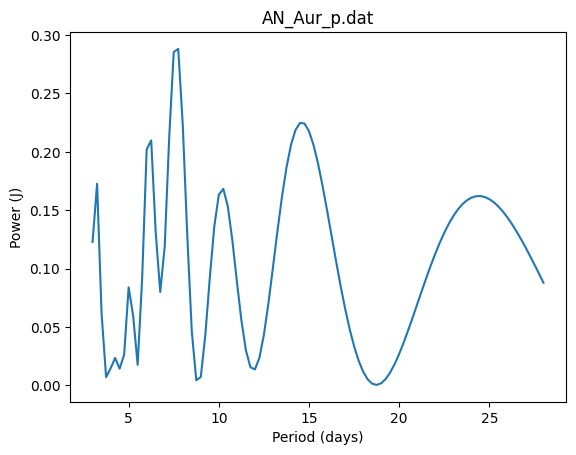

In [115]:
# time since the first sample
relative_time = time - time [0]
# calculate the power spectrum
power = powerSpectrum( relative_time , v_magnitudes , periods )
# plot the power vs trial periods
plt.figure()
plt.title("AN_Aur_p.dat")
plt.xlabel("Period (days)")
plt.ylabel("Power (J)")
plt.plot( periods , power )
plt.savefig('AN_Aur_p.dat power vs period.png')
plt.show()

The peaks seen on this graph are the ones that will be extracted into arrays below for further analysis. This will weed out the aliases.

In [116]:
# finds the peak indices
peak_indice , _ = find_peaks ( power , distance =5)
# converts the indices to periods
peak_period = periods [ peak_indice ]


In [117]:
print(peak_indice)
print(peak_period)

[ 1  8 13 19 29 46 86]
[ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ]


### For all the Stars

Since it can be completed for one star, the next task is to do it for all 18. The process is all the same as above, it just has to be cycled through for all of the data sets, thus a few [for] loops have been used.

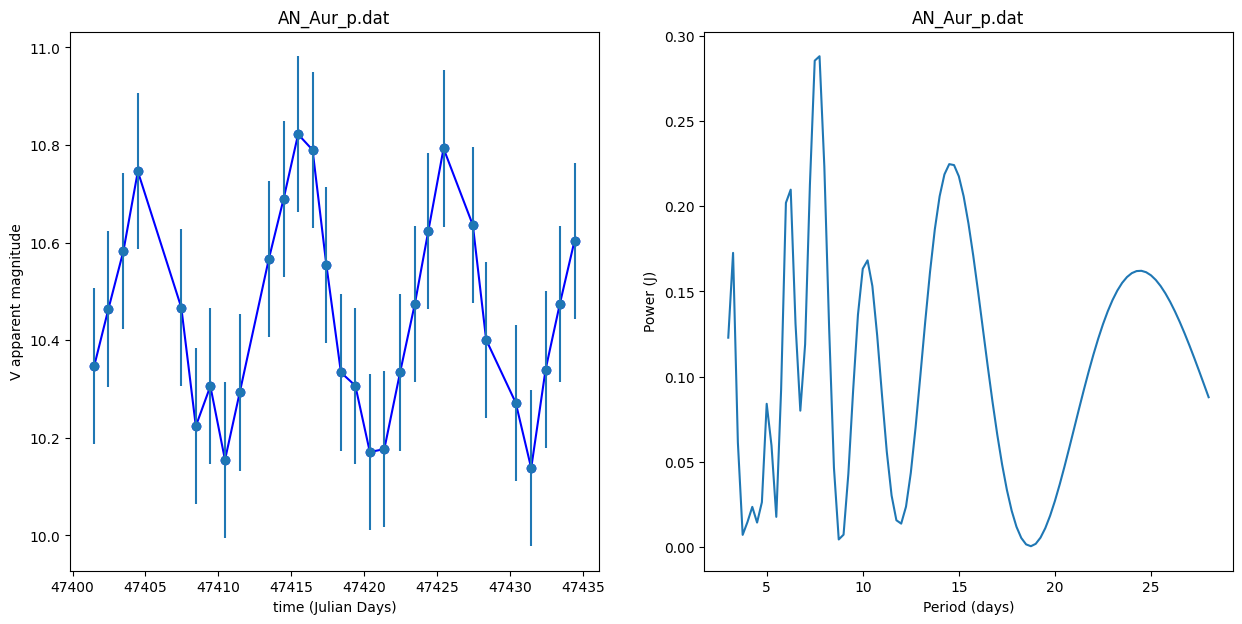

AN_Aur_p.dat
Peak indices: [ 1  8 13 19 29 46 86]
Peak periods: [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ]


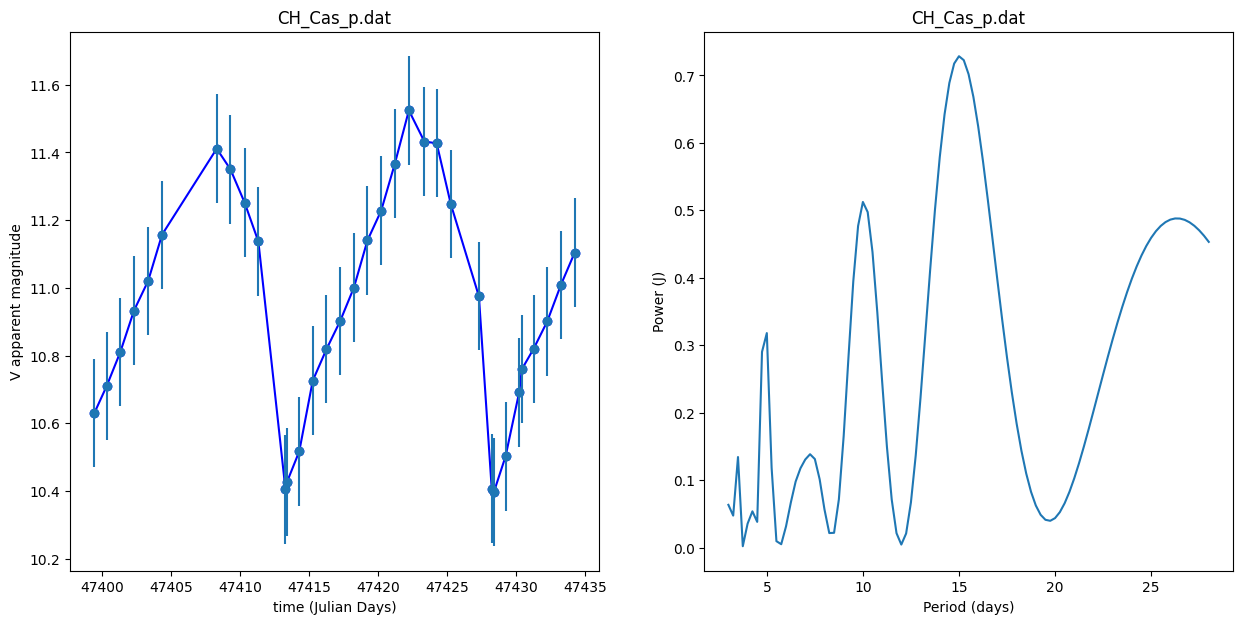

CH_Cas_p.dat
Peak indices: [ 2  8 17 28 48 93]
Peak periods: [ 3.5   5.    7.25 10.   15.   26.25]


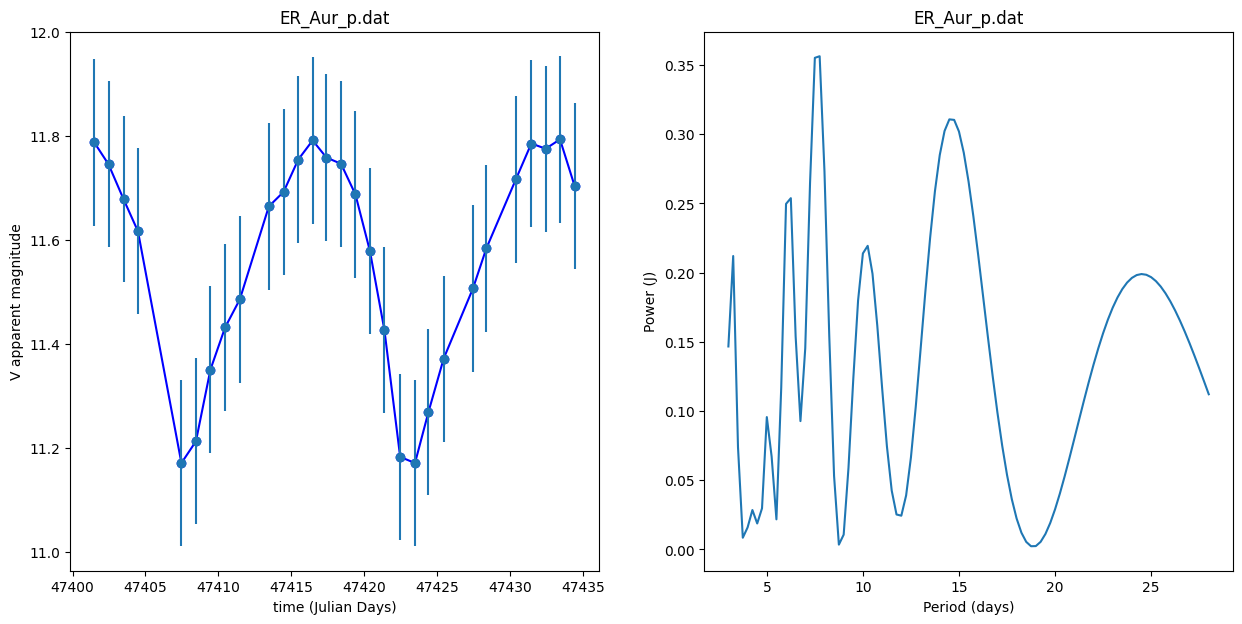

ER_Aur_p.dat
Peak indices: [ 1  8 13 19 29 46 86]
Peak periods: [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ]


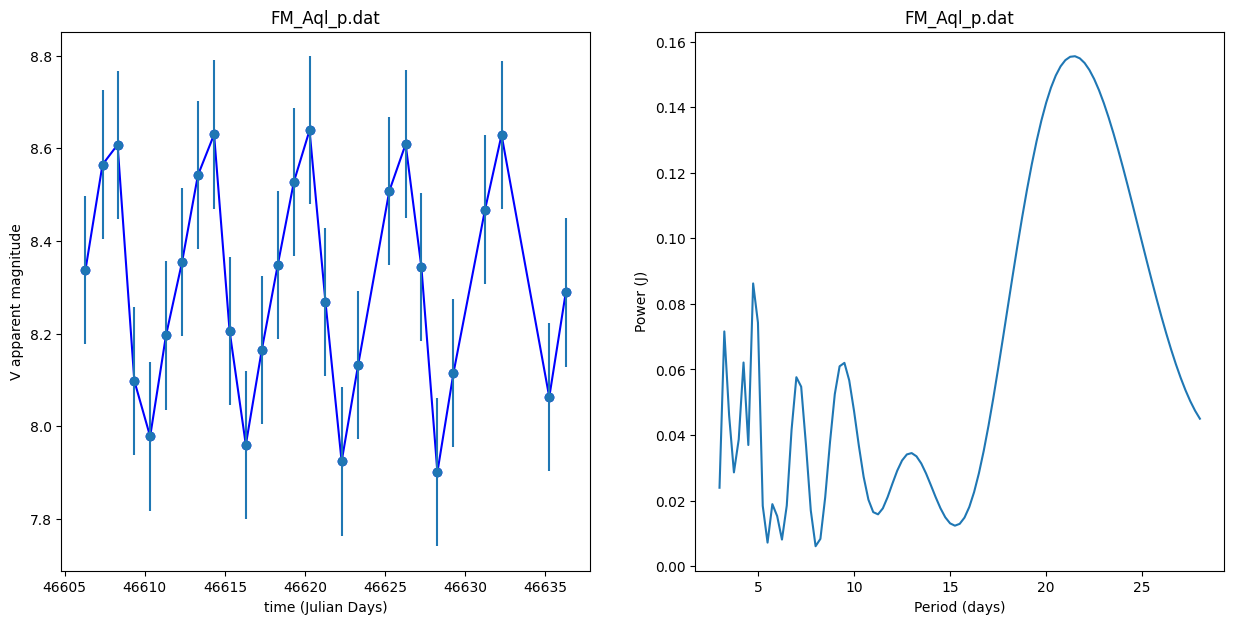

FM_Aql_p.dat
Peak indices: [ 1  7 16 26 40 74]
Peak periods: [ 3.25  4.75  7.    9.5  13.   21.5 ]


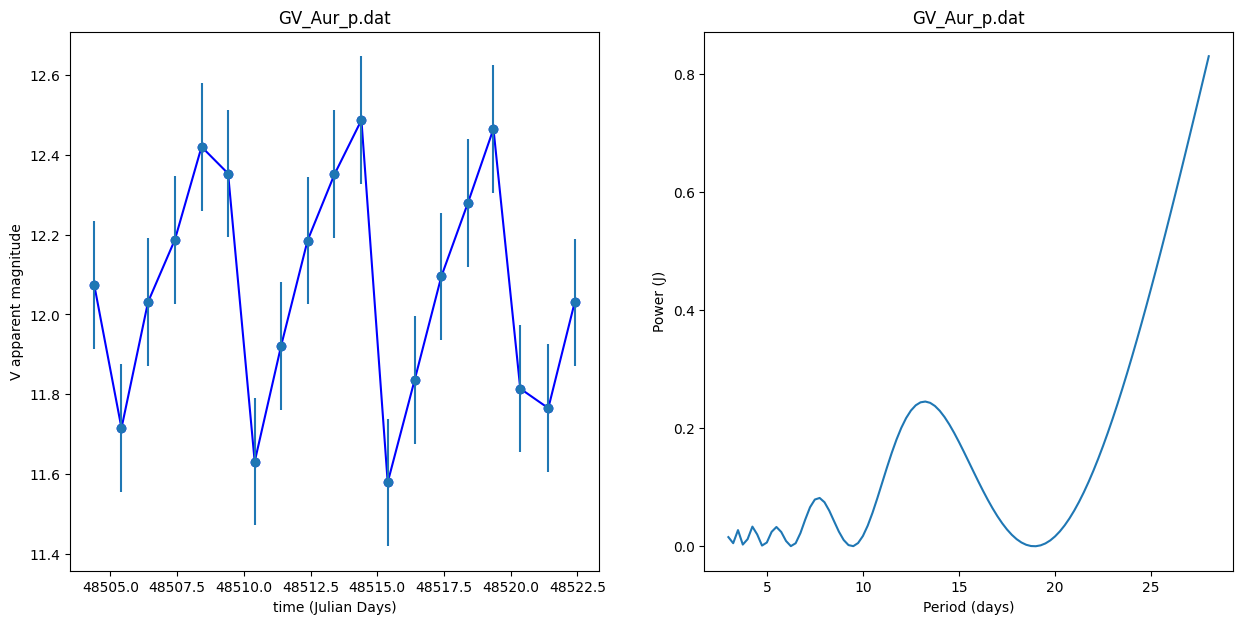

GV_Aur_p.dat
Peak indices: [ 5 10 19 41]
Peak periods: [ 4.25  5.5   7.75 13.25]


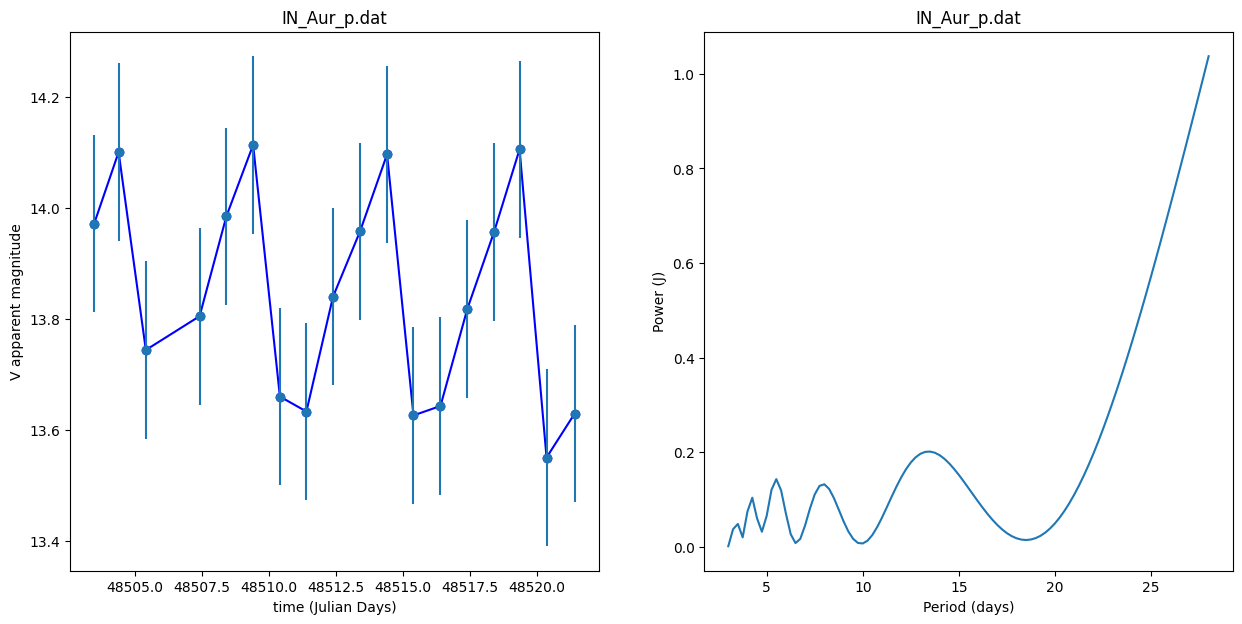

IN_Aur_p.dat
Peak indices: [ 5 10 20 42]
Peak periods: [ 4.25  5.5   8.   13.5 ]


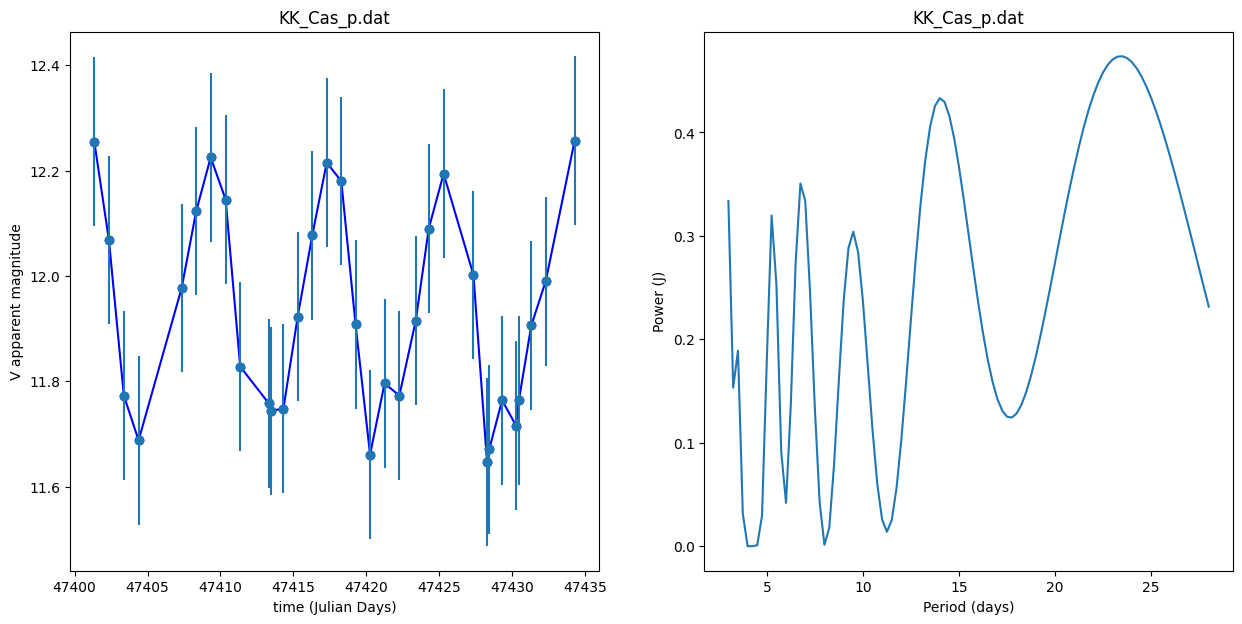

KK_Cas_p.dat
Peak indices: [ 2  9 15 26 44 82]
Peak periods: [ 3.5   5.25  6.75  9.5  14.   23.5 ]


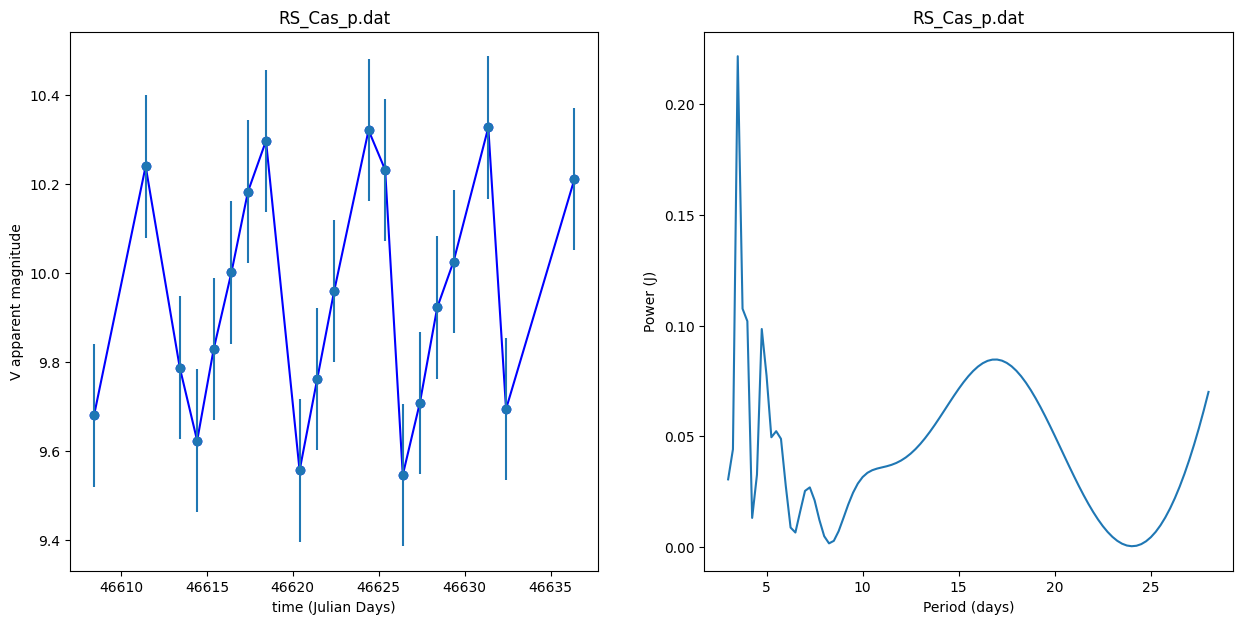

RS_Cas_p.dat
Peak indices: [ 2  7 17 56]
Peak periods: [ 3.5   4.75  7.25 17.  ]


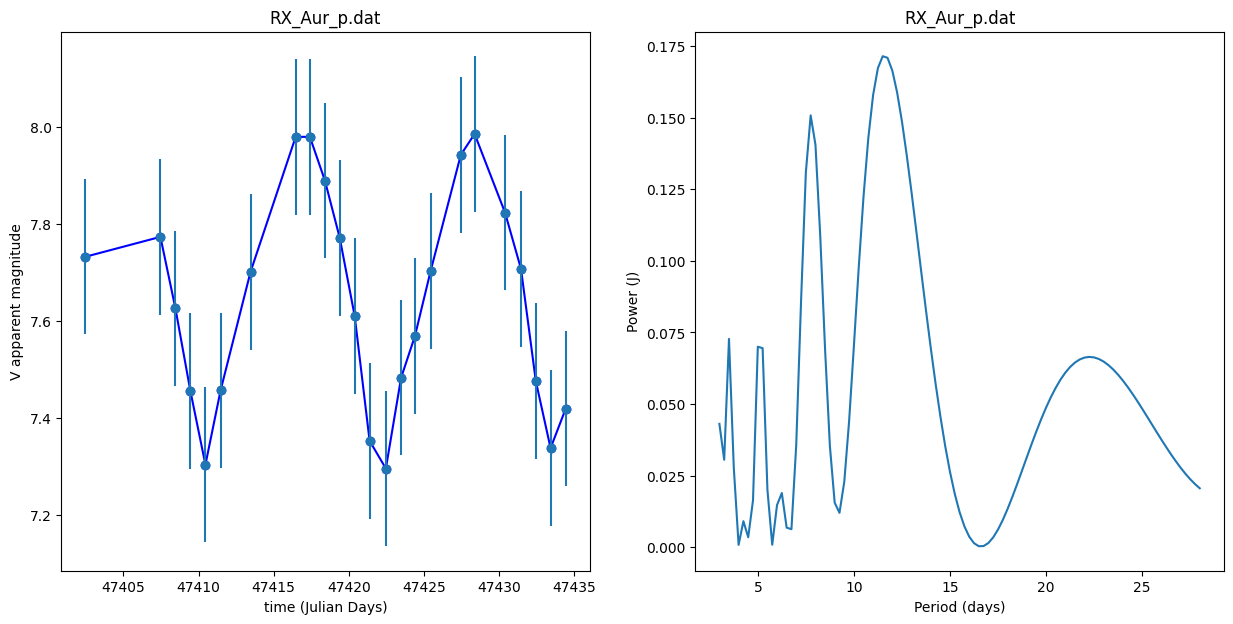

RX_Aur_p.dat
Peak indices: [ 2  8 13 19 34 77]
Peak periods: [ 3.5   5.    6.25  7.75 11.5  22.25]


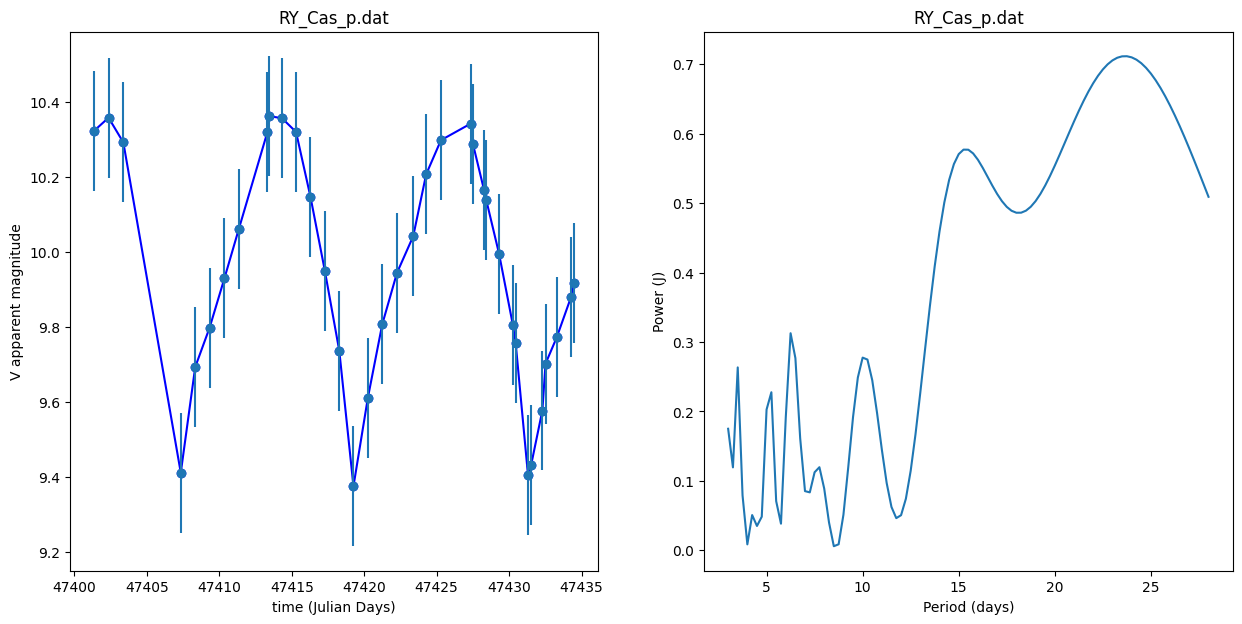

RY_Cas_p.dat
Peak indices: [ 2 13 19 28 49 83]
Peak periods: [ 3.5   6.25  7.75 10.   15.25 23.75]


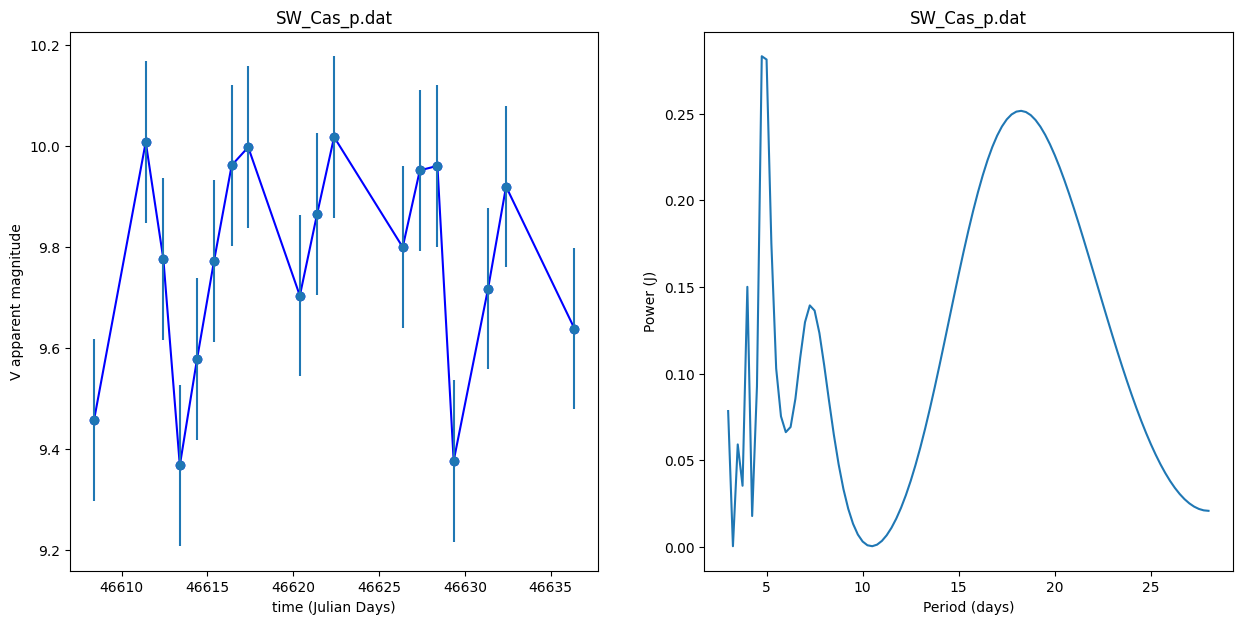

SW_Cas_p.dat
Peak indices: [ 2  7 17 61]
Peak periods: [ 3.5   4.75  7.25 18.25]


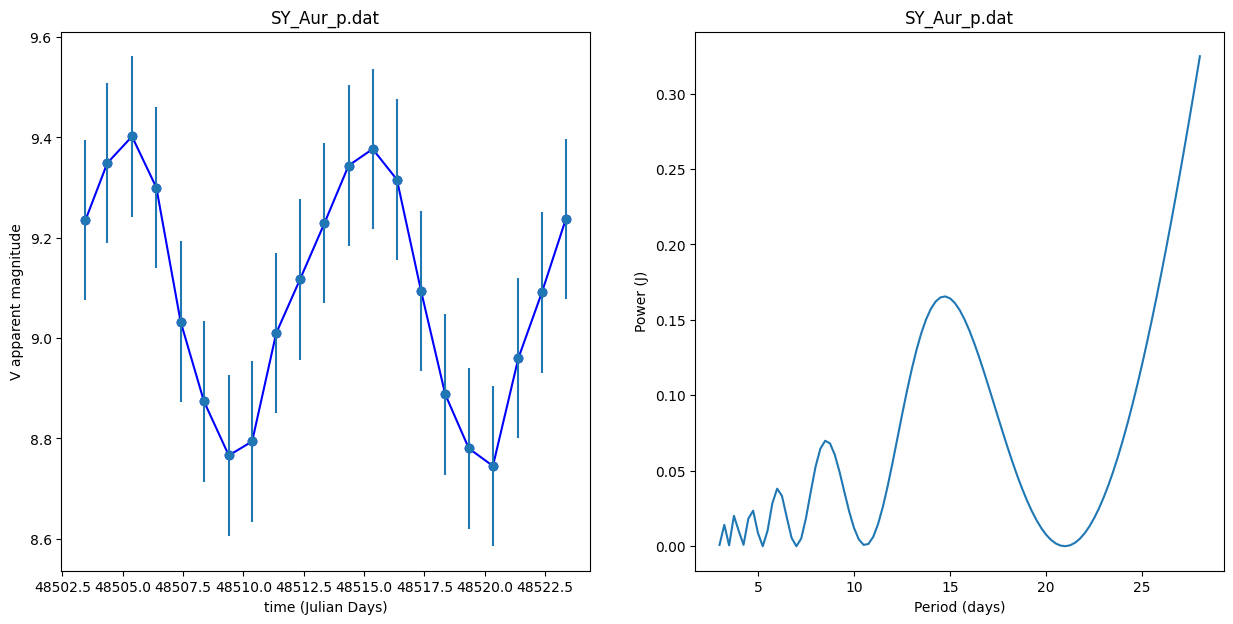

SY_Aur_p.dat
Peak indices: [ 1  7 12 22 47]
Peak periods: [ 3.25  4.75  6.    8.5  14.75]


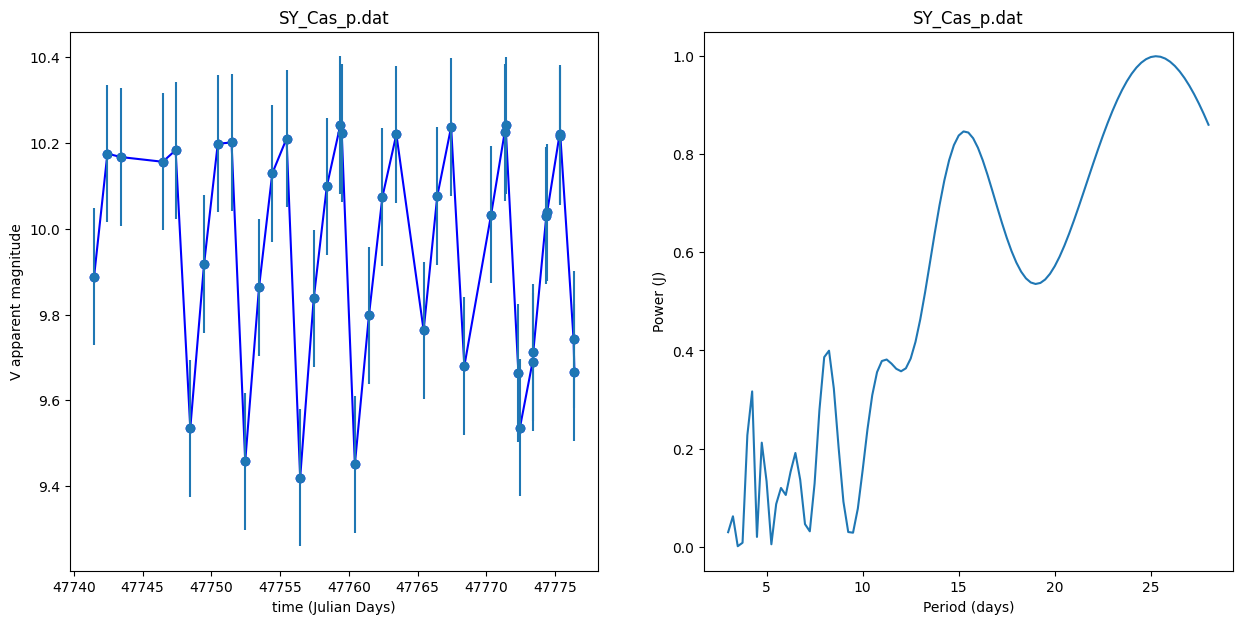

SY_Cas_p.dat
Peak indices: [ 5 14 21 33 49 89]
Peak periods: [ 4.25  6.5   8.25 11.25 15.25 25.25]


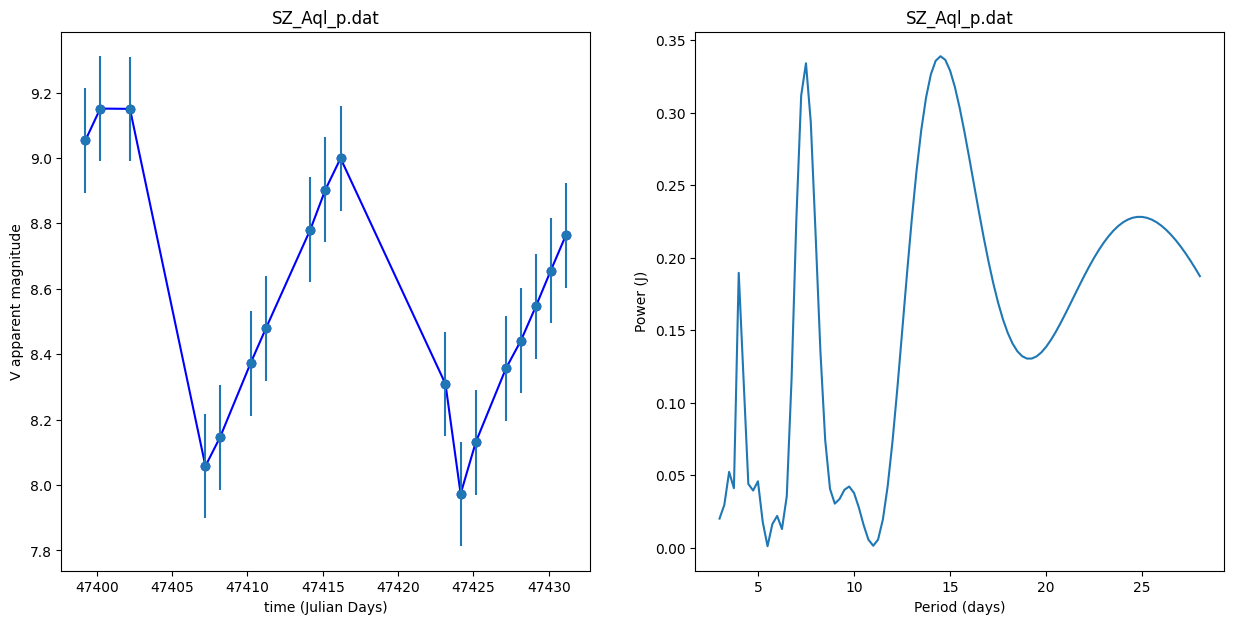

SZ_Aql_p.dat
Peak indices: [ 4 12 18 27 46 87]
Peak periods: [ 4.    6.    7.5   9.75 14.5  24.75]


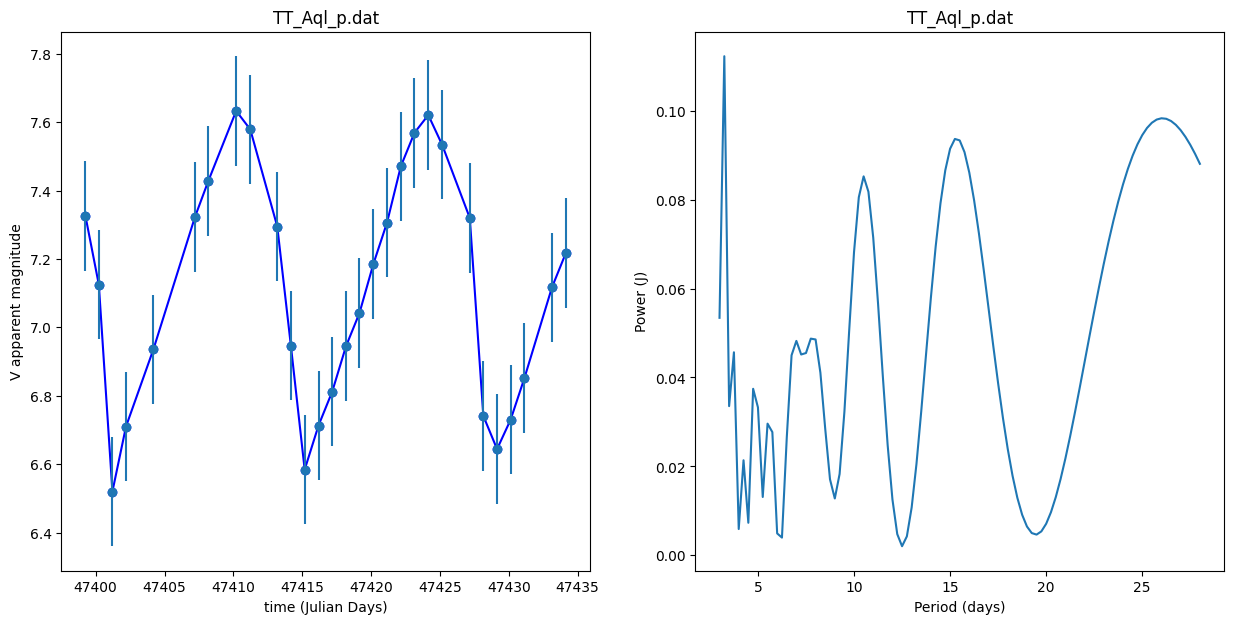

TT_Aql_p.dat
Peak indices: [ 1  7 19 30 49 92]
Peak periods: [ 3.25  4.75  7.75 10.5  15.25 26.  ]


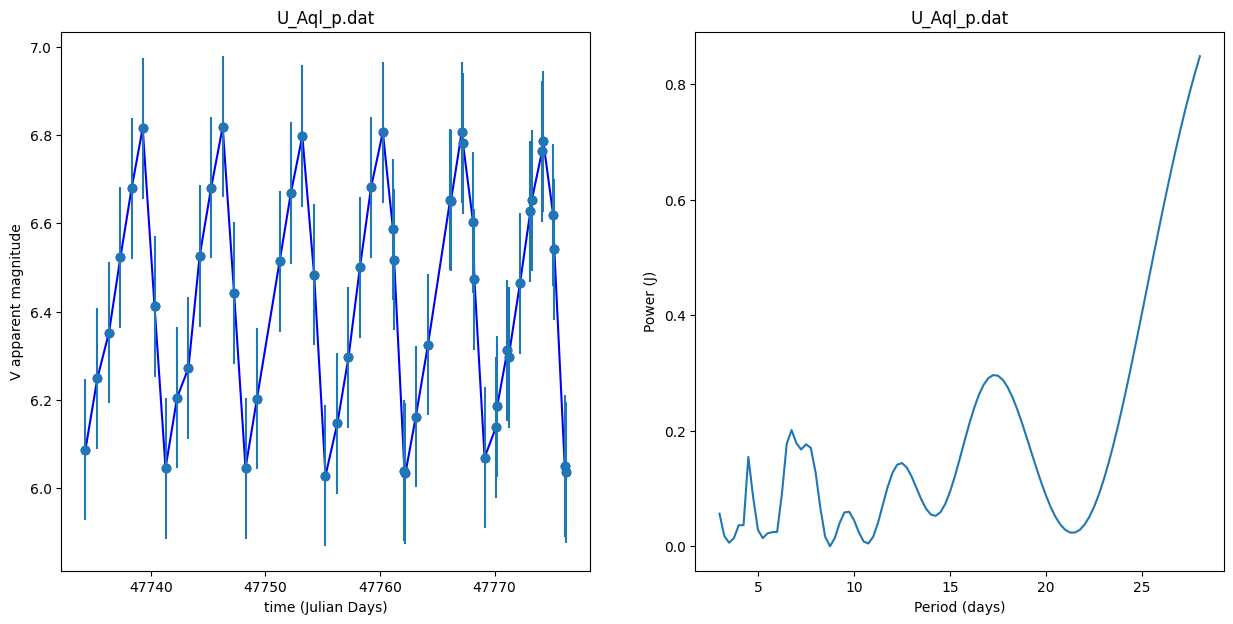

U_Aql_p.dat
Peak indices: [ 6 15 27 38 57]
Peak periods: [ 4.5   6.75  9.75 12.5  17.25]


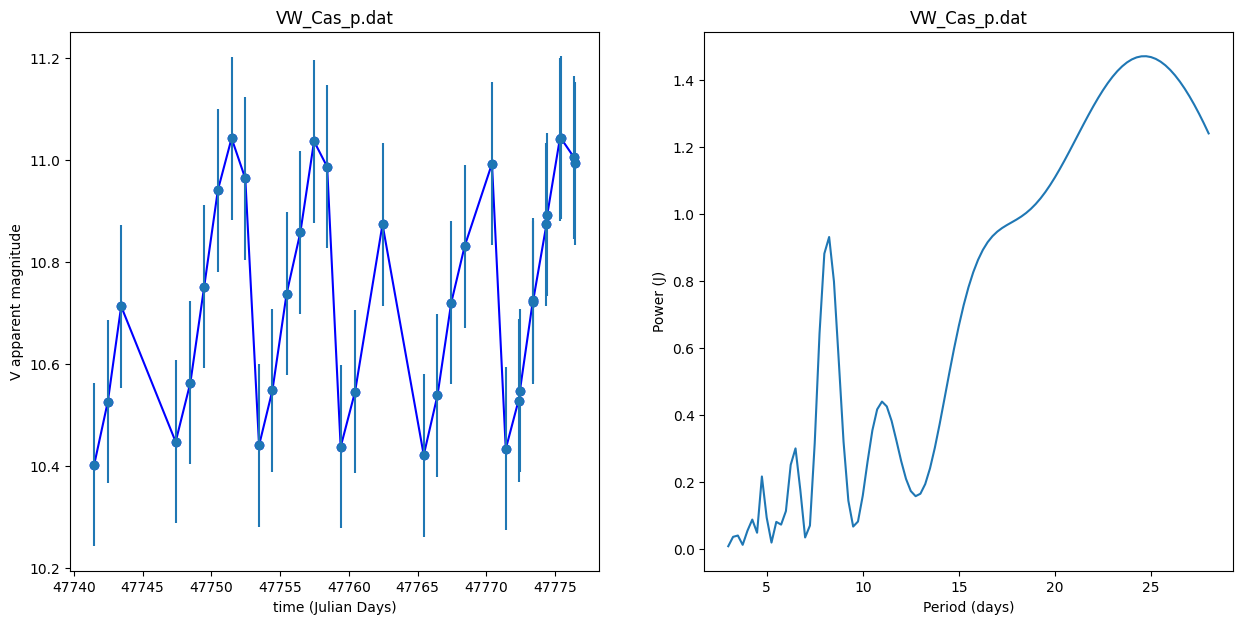

VW_Cas_p.dat
Peak indices: [ 2  7 14 21 32 87]
Peak periods: [ 3.5   4.75  6.5   8.25 11.   24.75]


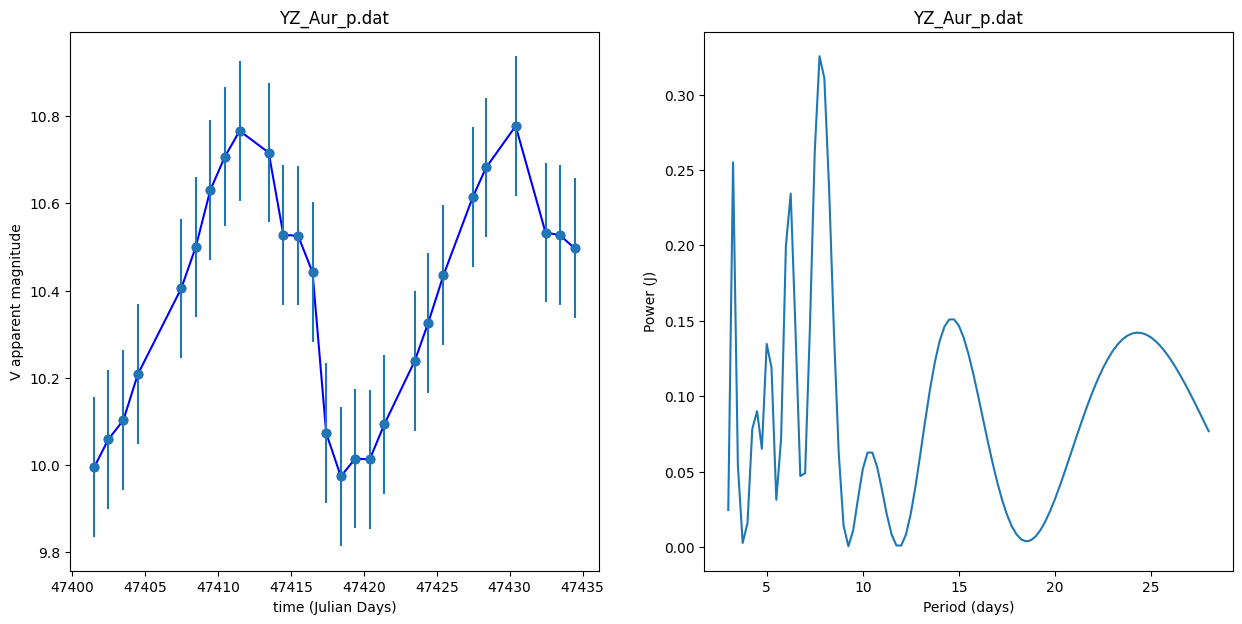

YZ_Aur_p.dat
Peak indices: [ 1  8 13 19 29 47 85]
Peak periods: [ 3.25  5.    6.25  7.75 10.25 14.75 24.25]


In [118]:
path ="data_files/"
# finds the files in directory path ending with ". dat "
file_list = [ f for f in sorted (os.listdir(path))
if f.endswith(".dat") ]
# loops over them
for ff in file_list:
    filename = path + ff
    t , v_mag = np . loadtxt ( filename ,
    unpack = True , usecols =[0 ,1])
# Now perform analysis on current data ....

    plt.figure(figsize=[15,7])
    plt.subplot(1,2,1)
    plt.plot(t , v_mag ,'o-', color = 'blue')
    plt.errorbar(t , v_mag, yerr = mverror, fmt='o')
    plt.title(ff)
    plt.xlabel("time (Julian Days)")
    plt.ylabel("V apparent magnitude")


# time since the first sample
    relative_time = t - t[0]
# calculate the power spectrum
    power = powerSpectrum( relative_time , v_mag , periods )
    
# plot the power vs trial periods
    plt.subplot(1,2,2)
    plt.title(ff)
    plt.xlabel("Period (days)")
    plt.ylabel("Power (J)")
    plt.plot( periods , power )
    
    plt.show()
    
# finds the peak indices
    peak_indices , _ = find_peaks ( power , distance =5)
# converts the indices to periods
    peak_periods = periods [ peak_indices ]
    
    print(ff)
    print('Peak indices:',peak_indices)
    print('Peak periods:',peak_periods)


## Task 2 - Least Squares Fitting

In this task the second technique is implemented, the least squares fitting method. Using the good approximations given from Task 1, this method will measure the quality of the fits to the original data, thus disqualifying any aliases produced from Task 1. In addition, it will give other information needed e.g. the fitted mean apparenet magnitude that will be used in Task 3. The $\chi^2$ function that will be used is; 

\begin{align}
\chi^2 = \sum^{n}_{i=1} \frac{\left(m_{Vi}-m_{Vi}^{model}\right)^2}{\sigma^2}
\end{align}
where $\sigma$ is the uncertaitny of $m_V$ which is $\pm 0.16$.

The fluctuations in a Cepheid's visual apparent magnitude is given below;
\begin{align}
m_{V}^{model} = m_{Vo} + \Delta m_{V} sin\left(\frac{2 \pi t}{P} + \phi \right)
\end{align}

where; $m_Vo$ is the mean visual apparent magnitude; $\Delta m_V$ is the amplitude variation (maximum $m_V$ - minimum $m_V$); $P$ is period; and $\phi$ is the phase shift. Below this was chosen to be zero as after consulting a demonstrator it was deemed to be so small a number that is negligable in the calculation. It is worth noting that this assumtion will cause a very slight inaccuracy in the data.

The $\chi^2$ test will be applied to the best peaks from Task 1 in order to determine which one has the best period. The way to determine this is by which one has the smallest $\chi^2$ value. 

As before this task will be completed for one star then extrapolated for all 18. 


## Single star 

defining function for $m_{V}^{model}$

In [119]:
mv_o = np.mean(v_magnitudes)

In [120]:
deltamv = (np.max(v_magnitudes)-np.min(v_magnitudes))/(2)
realtive_t = time - time[0]

In [121]:
def model(tme, deltamv, mv_o, P, phi):
    return mv_o + deltamv*np.sin((2*(np.pi)*tme)/(P) + phi)

I am aware that [curve_fit] has its own $\chi^2$ function, however I wanted to define it myself as it gave me more practice with the [def] command in Python and also allowed me greater control over the values. This is what I was most comfortable doing and worked the best with what I was planning to do. 

In [122]:
def chai(m_v, m_vmodel):
    return np.sum((m_v - m_vmodel)**2/(0.16**2))
    
chisquare = []

In [123]:
highchisquare = 10000000000
x=0

the period is 3.250 days
the chi square value for this fit is 0.187
the period is 5.000 days
the chi square value for this fit is 2.094
the period is 6.250 days
the chi square value for this fit is 1.760
the period is 7.750 days
the chi square value for this fit is 1.760
the period is 10.250 days
the chi square value for this fit is 43.526
the period is 14.500 days
the chi square value for this fit is 43.526
the period is 24.500 days
the chi square value for this fit is 0.947
This is the best chi square value; 0.187, this the corresponding period; 3.25 this is the corresponding m_v; 10.452


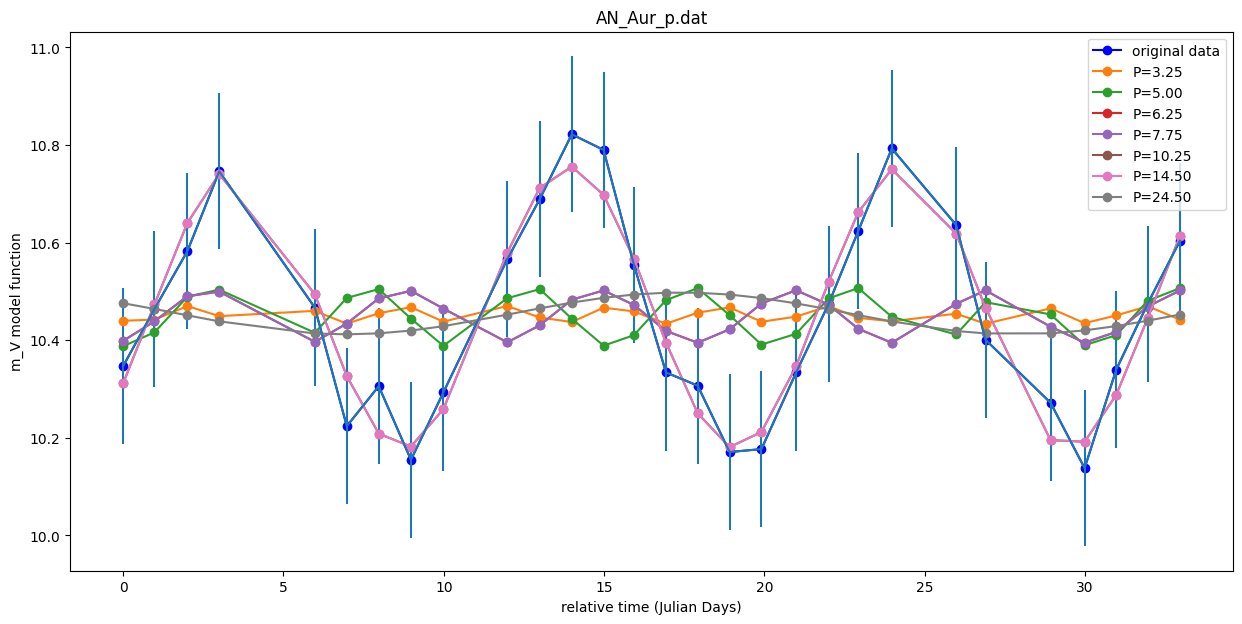

In [124]:
plt.figure(figsize=[15,7])
plt.plot(realtive_t , v_magnitudes , 'o-' , color = 'blue', label = 'original data')
plt.errorbar(realtive_t , v_magnitudes, yerr = mverror)
for item in peak_period:
    param, pcov = scipy.optimize.curve_fit(model, realtive_t, v_magnitudes, p0 = [mv_o, deltamv, peak_period.tolist()[x], 0], 
                                            absolute_sigma=False)
    perr = np.sqrt(np.diag(pcov))
    plt.plot(realtive_t, model(realtive_t, param[0],param[1],param[2], param[3]),'o-', label = f'P={peak_period.tolist()[x]:.2f}')
    plt.title("AN_Aur_p.dat")
    plt.legend()
    plt.xlabel("relative time (Julian Days)")
    plt.ylabel("m_V model function")
    print(f'the period is {peak_period.tolist()[x]:.3f} days')
    mvmodel = model(realtive_t, param[0],param[1],param[2],param[3])
    chisquare.append(chai(mv_o, mvmodel))
    print(f'the chi square value for this fit is {chisquare[x]:.3f}')
    if chisquare[x] < highchisquare:
        highchisquare = chisquare[x]
        bestpeak = peak_period.tolist()[x]
        parameter_1 = param[1]
    x=x+1
       
print(f'This is the best chi square value; {highchisquare:.3f}, this the corresponding period;', bestpeak, 
      f'this is the corresponding m_v; {parameter_1:.3f}')
plt.show()

The $\chi^2$ value is meant to be the smallest value, I do not know why my best fit is the highest $\chi^2$ value but I have extracted the best fit as can be seen from the plot of original data. I know this is not what we are meant to see but it is a consistent problem with all my data. In addition, I am not using the value gained from $\chi^2$ in calculations so it is not ideal but an okay situation. 

I have also decided that because this graph is already really busy I will not be displaying the error bars but they are calculated. This will be the same for when the 18 are plotted. Error propagation can be done manually, however, doing the square root of the diagonalised matrix obtained from the covariance parameter extracts the needed uncertainty. This saves a lot of time propagating errors so this is the method I will be using.

### For all the Stars
The same process above is repeated but for all of the 18 stars, all that is different is the inclusion of another for loop. The code below builds a lot on what was written above, with the inclusion of what was done for the single star of this task.

For Task 3 I need a panda table, here I start defining some of the tables needed for later.

In [125]:
T3 = pd.read_csv('cepheid_table.csv') 


AN_Aur_p.dat :
the period is 3.250 days
the chi square value for this period is 0.187
the period is 5.000 days
the chi square value for this period is 2.094
the period is 6.250 days
the chi square value for this period is 1.760
the period is 7.750 days
the chi square value for this period is 1.760
the period is 10.250 days
the chi square value for this period is 43.526
the period is 14.500 days
the chi square value for this period is 43.526
the period is 24.500 days
the chi square value for this period is 0.947
This is the best chi square value; 0.187, this the corresponding period; 3.25 this is the corresponding m_v; 10.452


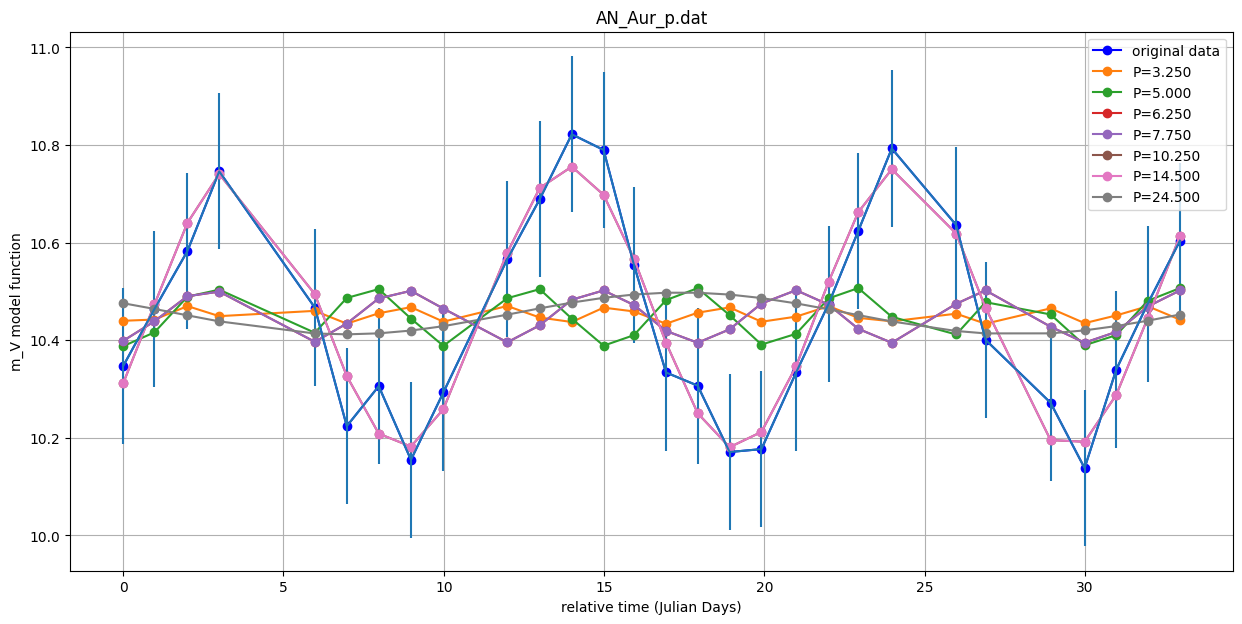

CH_Cas_p.dat :
the period is 3.500 days
the chi square value for this period is 9.038
the period is 5.000 days
the chi square value for this period is 3.370
the period is 7.250 days
the chi square value for this period is 32.496
the period is 10.000 days
the chi square value for this period is 123.339
the period is 15.000 days
the chi square value for this period is 123.339
the period is 26.250 days
the chi square value for this period is 123.339
This is the best chi square value; 3.370, this the corresponding period; 5.0 this is the corresponding m_v; 10.955


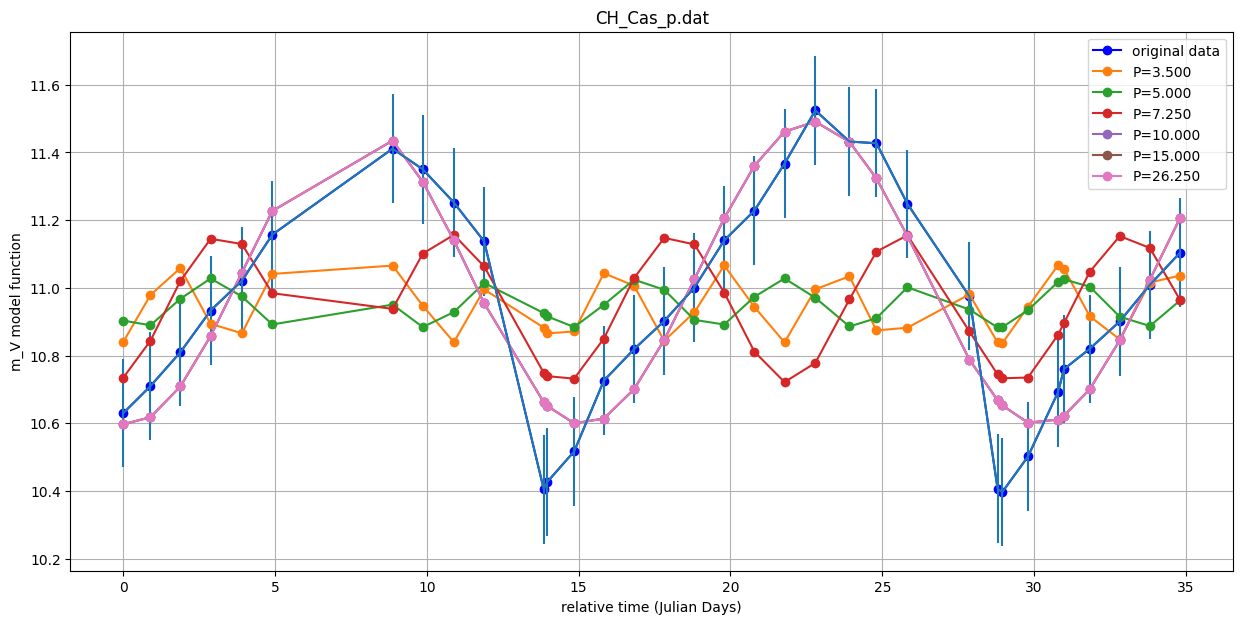

ER_Aur_p.dat :
the period is 3.250 days
the chi square value for this period is 0.167
the period is 5.000 days
the chi square value for this period is 1.120
the period is 6.250 days
the chi square value for this period is 4.903
the period is 7.750 days
the chi square value for this period is 4.903
the period is 10.250 days
the chi square value for this period is 1.090
the period is 14.500 days
the chi square value for this period is 46.660
the period is 24.500 days
the chi square value for this period is 1.453
This is the best chi square value; 0.167, this the corresponding period; 3.25 this is the corresponding m_v; 11.567


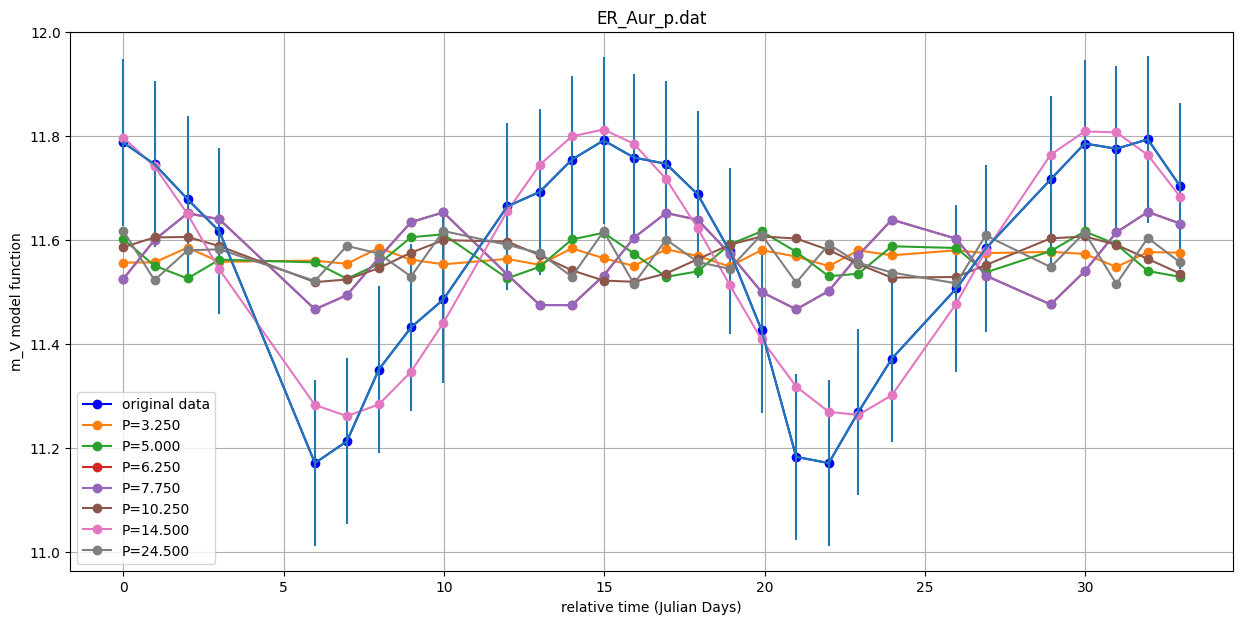

FM_Aql_p.dat :
the period is 3.250 days
the chi square value for this period is 4.706
the period is 4.750 days
the chi square value for this period is 1.446
the period is 7.000 days
the chi square value for this period is 53.055
the period is 9.500 days
the chi square value for this period is 3.104
the period is 13.000 days
the chi square value for this period is 1.197
the period is 21.500 days
the chi square value for this period is 0.209
This is the best chi square value; 0.209, this the corresponding period; 21.5 this is the corresponding m_v; 8.310


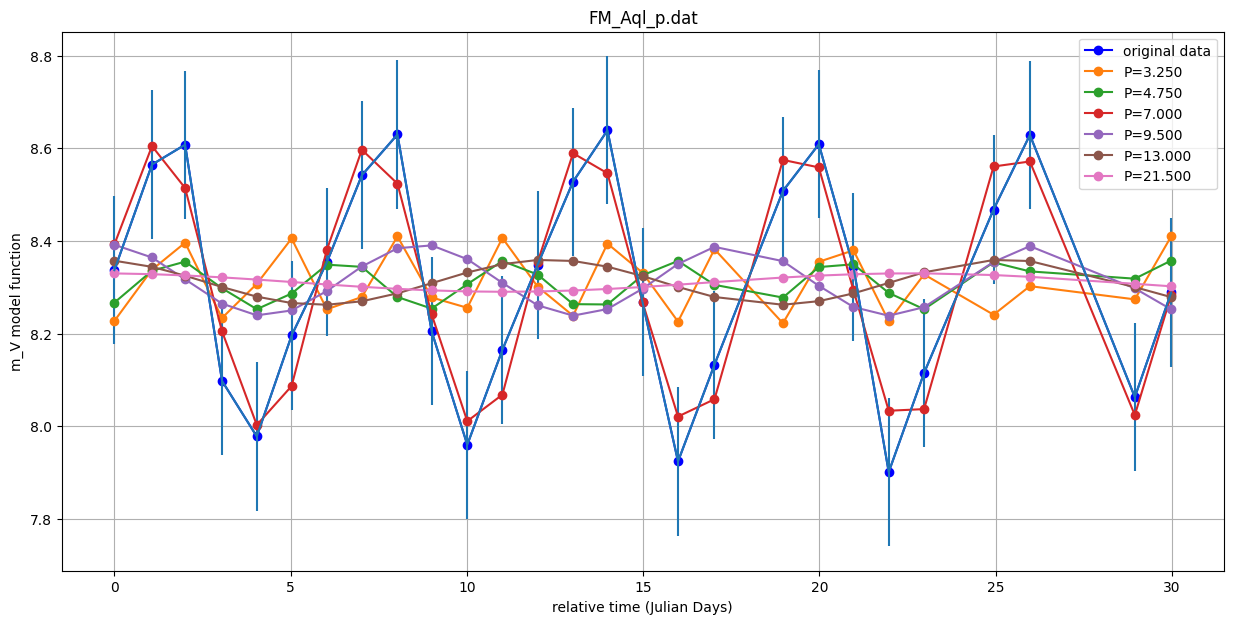

GV_Aur_p.dat :
the period is 4.250 days
the chi square value for this period is 45.654
the period is 5.500 days
the chi square value for this period is 45.654
the period is 7.750 days
the chi square value for this period is 2.293
the period is 13.250 days
the chi square value for this period is 2.293
This is the best chi square value; 2.293, this the corresponding period; 13.25 this is the corresponding m_v; 12.066


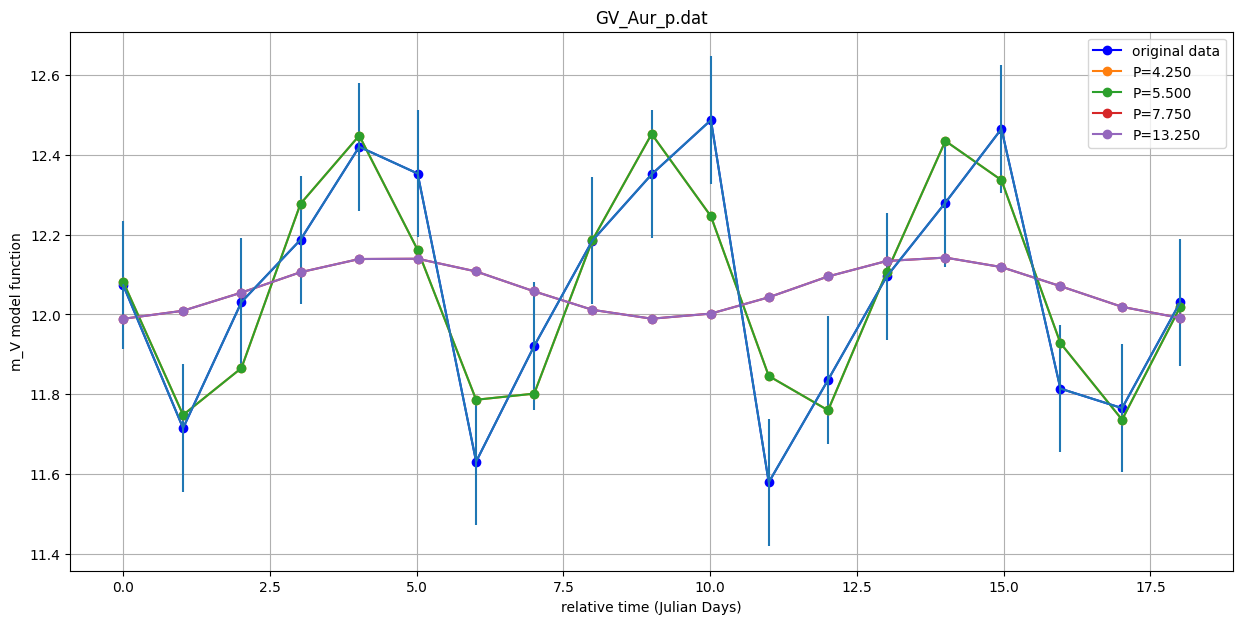

IN_Aur_p.dat :
the period is 4.250 days
the chi square value for this period is 21.115
the period is 5.500 days
the chi square value for this period is 21.115
the period is 8.000 days
the chi square value for this period is 0.598
the period is 13.500 days
the chi square value for this period is 2.531
This is the best chi square value; 0.598, this the corresponding period; 8.0 this is the corresponding m_v; 13.843


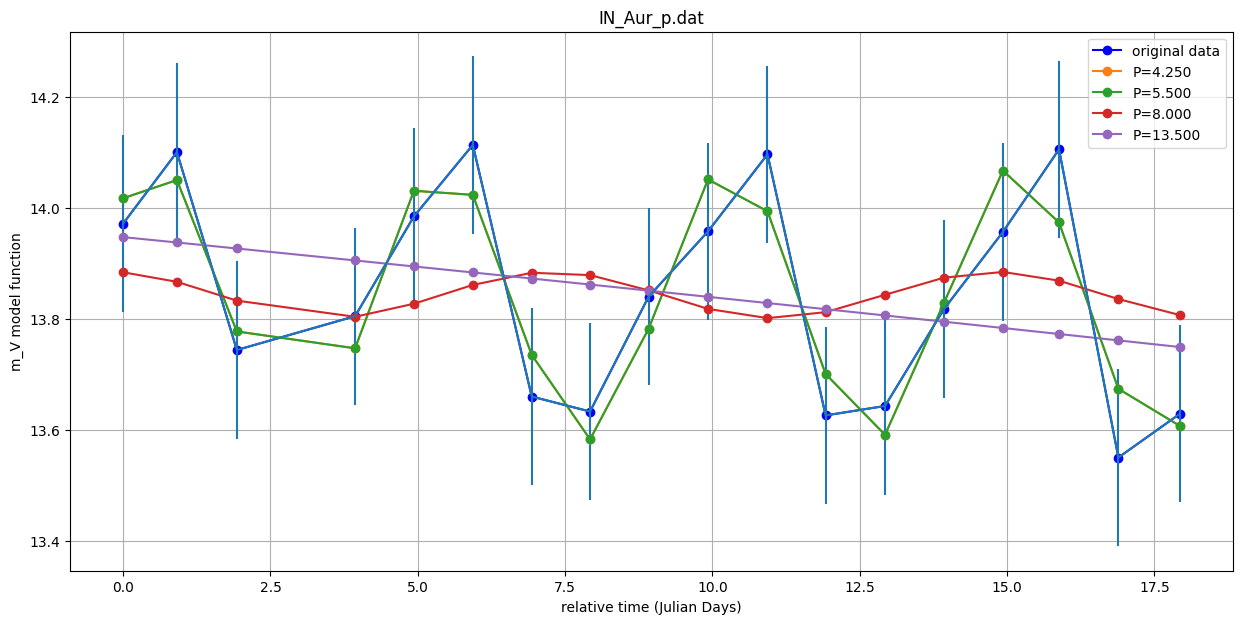

KK_Cas_p.dat :
the period is 3.500 days
the chi square value for this period is 1.501
the period is 5.250 days
the chi square value for this period is 1.466
the period is 6.750 days
the chi square value for this period is 43.235
the period is 9.500 days
the chi square value for this period is 43.235
the period is 14.000 days
the chi square value for this period is 4.206
the period is 23.500 days
the chi square value for this period is 43.235
This is the best chi square value; 1.466, this the corresponding period; 5.25 this is the corresponding m_v; 11.934


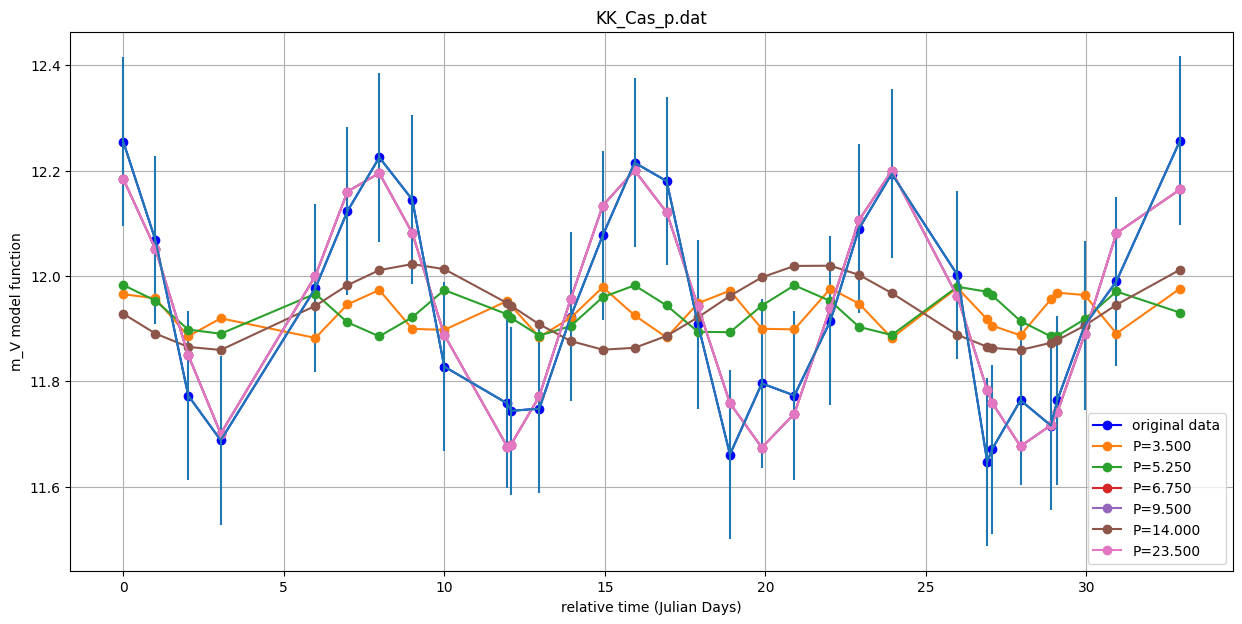

RS_Cas_p.dat :
the period is 3.500 days
the chi square value for this period is 6.097
the period is 4.750 days
the chi square value for this period is 1.151
the period is 7.250 days
the chi square value for this period is 46.496
the period is 17.000 days
the chi square value for this period is 0.905
This is the best chi square value; 0.905, this the corresponding period; 17.0 this is the corresponding m_v; 9.948


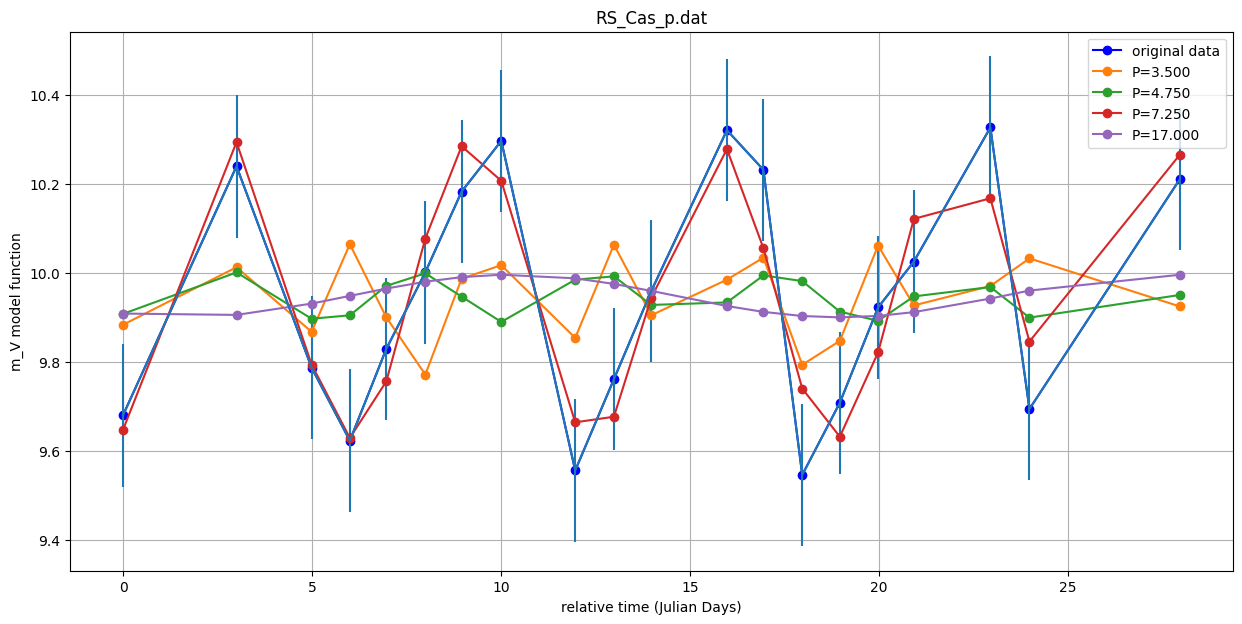

RX_Aur_p.dat :
the period is 3.500 days
the chi square value for this period is 4.534
the period is 5.000 days
the chi square value for this period is 4.375
the period is 6.250 days
the chi square value for this period is 6.100
the period is 7.750 days
the chi square value for this period is 43.797
the period is 11.500 days
the chi square value for this period is 43.797
the period is 22.250 days
the chi square value for this period is 1.923
This is the best chi square value; 1.923, this the corresponding period; 22.25 this is the corresponding m_v; 7.639


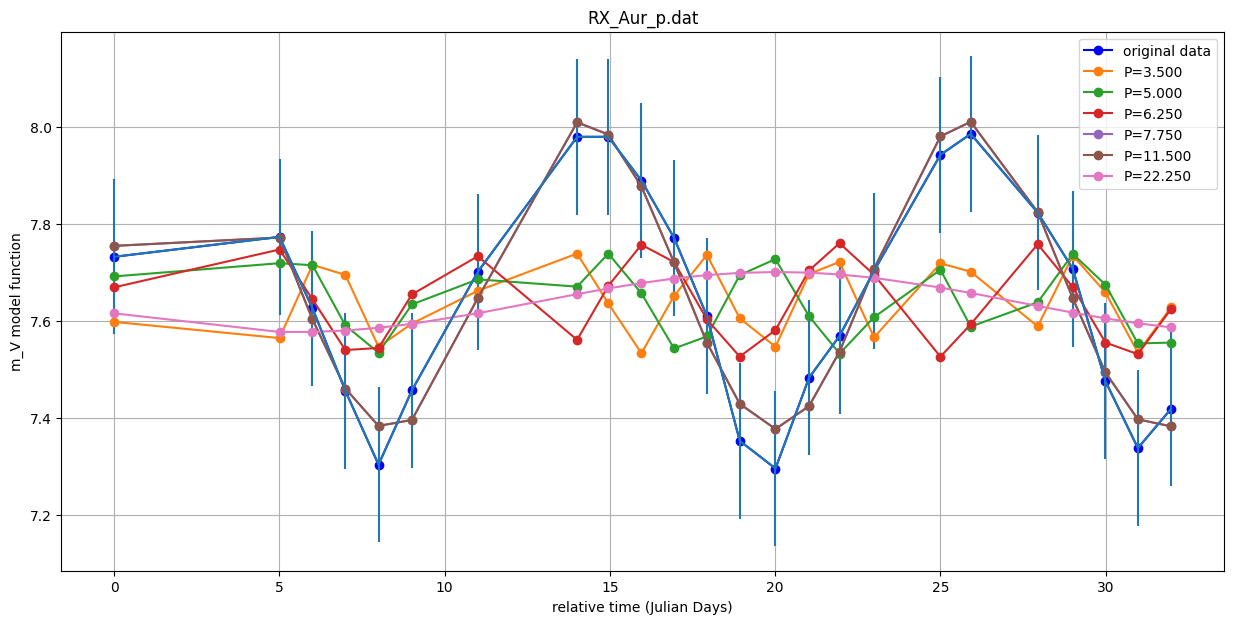

RY_Cas_p.dat :
the period is 3.500 days
the chi square value for this period is 7.703
the period is 6.250 days
the chi square value for this period is 22.044
the period is 7.750 days
the chi square value for this period is 10.749
the period is 10.000 days
the chi square value for this period is 121.662
the period is 15.250 days
the chi square value for this period is 121.662
the period is 23.750 days
the chi square value for this period is 8.711
This is the best chi square value; 7.703, this the corresponding period; 3.5 this is the corresponding m_v; 9.959


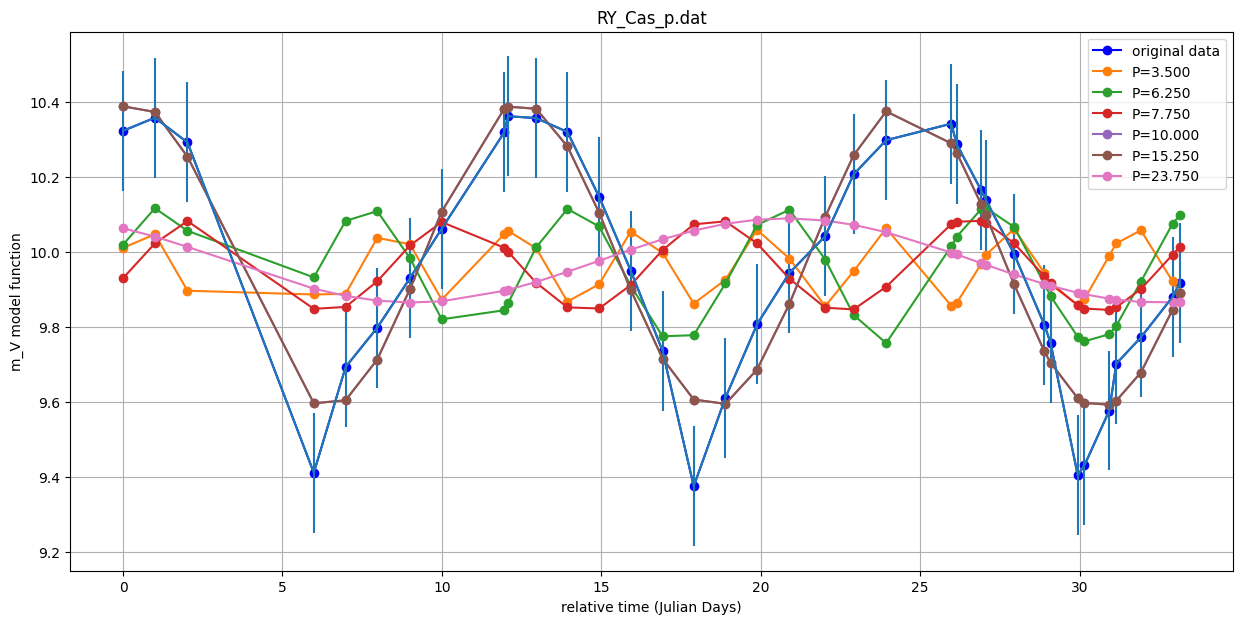

SW_Cas_p.dat :
the period is 3.500 days
the chi square value for this period is 1.875
the period is 4.750 days
the chi square value for this period is 26.686
the period is 7.250 days
the chi square value for this period is 7.371
the period is 18.250 days
the chi square value for this period is 5.109
This is the best chi square value; 1.875, this the corresponding period; 3.5 this is the corresponding m_v; 9.776


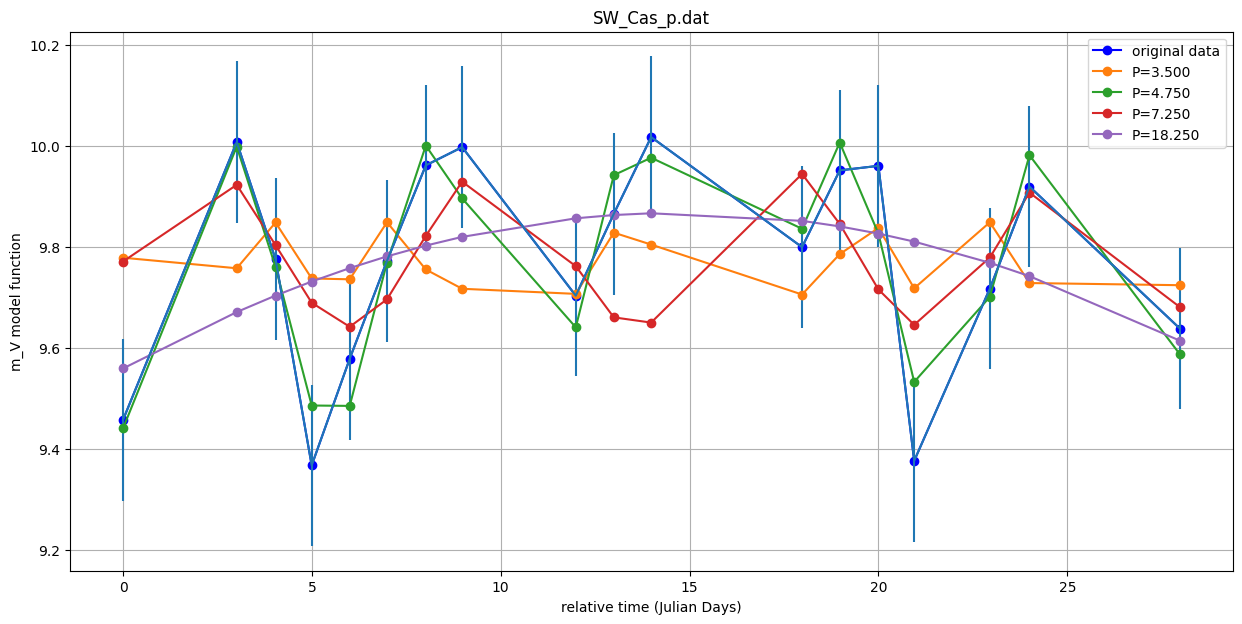

SY_Aur_p.dat :
the period is 3.250 days
the chi square value for this period is 0.270
the period is 4.750 days
the chi square value for this period is 3.801
the period is 6.000 days
the chi square value for this period is 3.801
the period is 8.500 days
the chi square value for this period is 37.469
the period is 14.750 days
the chi square value for this period is 37.469
This is the best chi square value; 0.270, this the corresponding period; 3.25 this is the corresponding m_v; 9.091


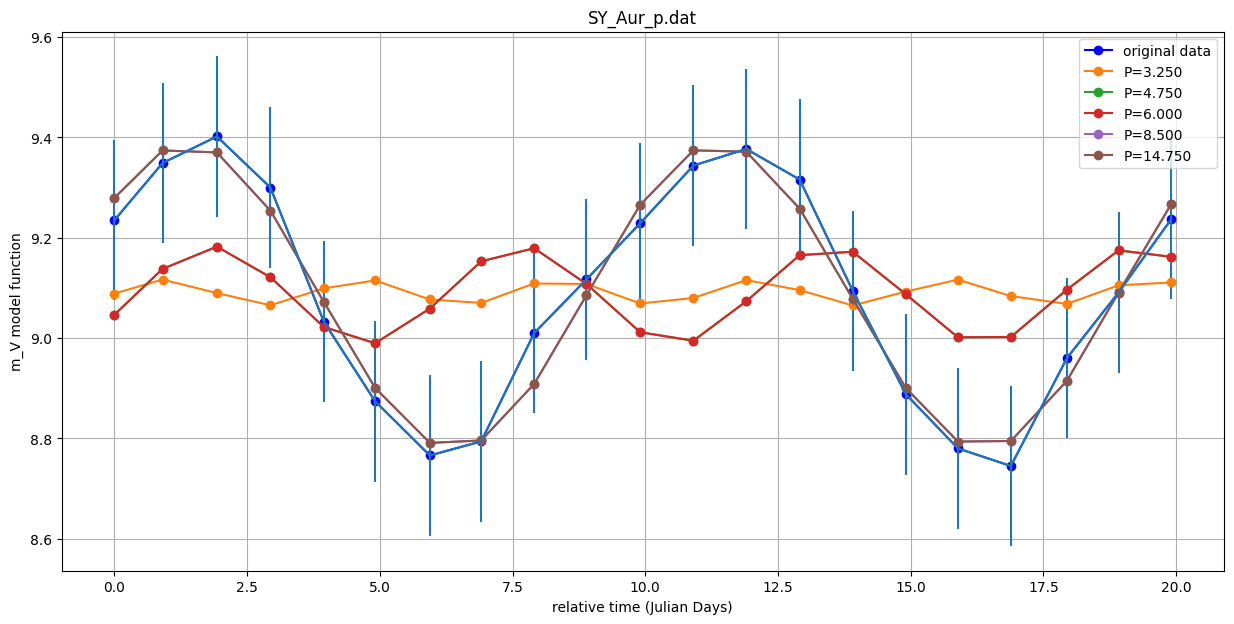

SY_Cas_p.dat :
the period is 4.250 days
the chi square value for this period is 91.653
the period is 6.500 days
the chi square value for this period is 6.767
the period is 8.250 days
the chi square value for this period is 1.370
the period is 11.250 days
the chi square value for this period is 1.312
the period is 15.250 days
the chi square value for this period is 3.739
the period is 25.250 days
the chi square value for this period is 3.739
This is the best chi square value; 1.312, this the corresponding period; 11.25 this is the corresponding m_v; 9.961


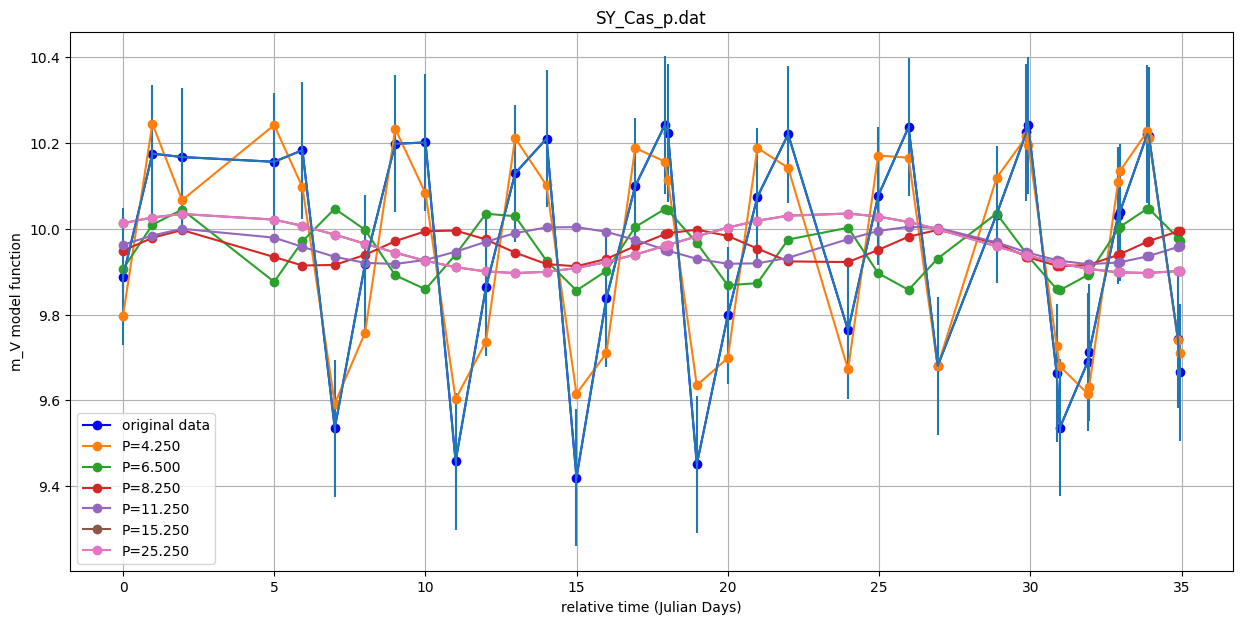

SZ_Aql_p.dat :
the period is 4.000 days
the chi square value for this period is 4.253
the period is 6.000 days
the chi square value for this period is 18.875
the period is 7.500 days
the chi square value for this period is 8.355
the period is 9.750 days
the chi square value for this period is 10.931
the period is 14.500 days
the chi square value for this period is 88.604
the period is 24.750 days
the chi square value for this period is 88.604
This is the best chi square value; 4.253, this the corresponding period; 4.0 this is the corresponding m_v; 8.553


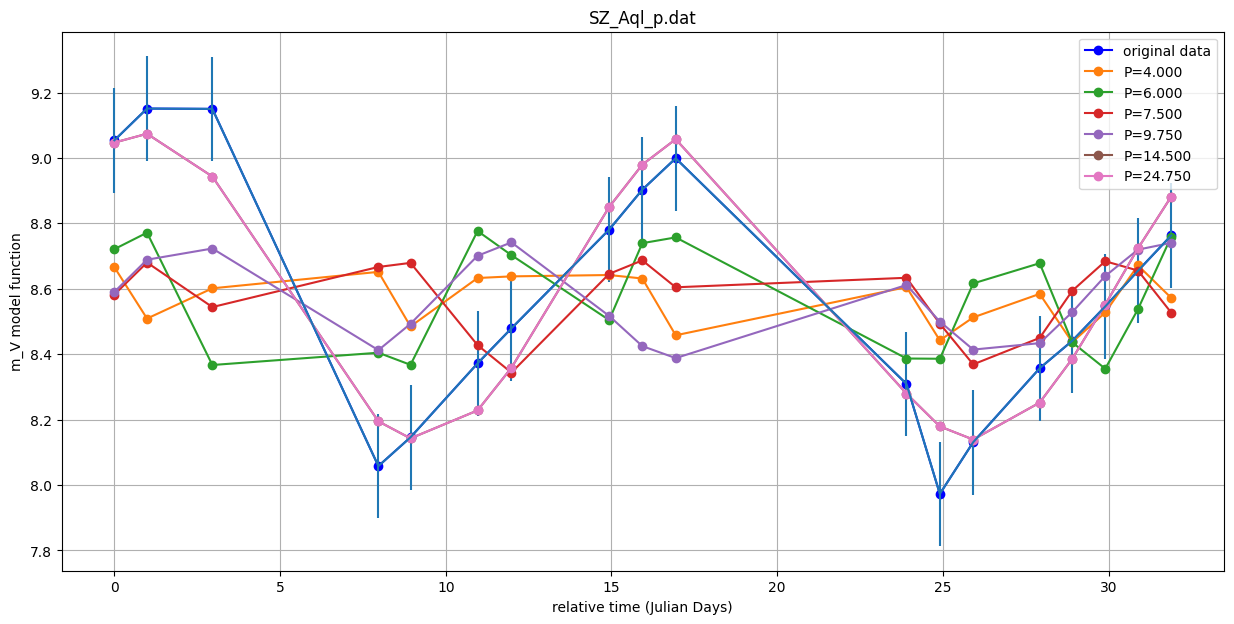

TT_Aql_p.dat :
the period is 3.250 days
the chi square value for this period is 9.461
the period is 4.750 days
the chi square value for this period is 4.176
the period is 7.750 days
the chi square value for this period is 15.770
the period is 10.500 days
the chi square value for this period is 113.538
the period is 15.250 days
the chi square value for this period is 113.538
the period is 26.000 days
the chi square value for this period is 5.353
This is the best chi square value; 4.176, this the corresponding period; 4.75 this is the corresponding m_v; 7.113


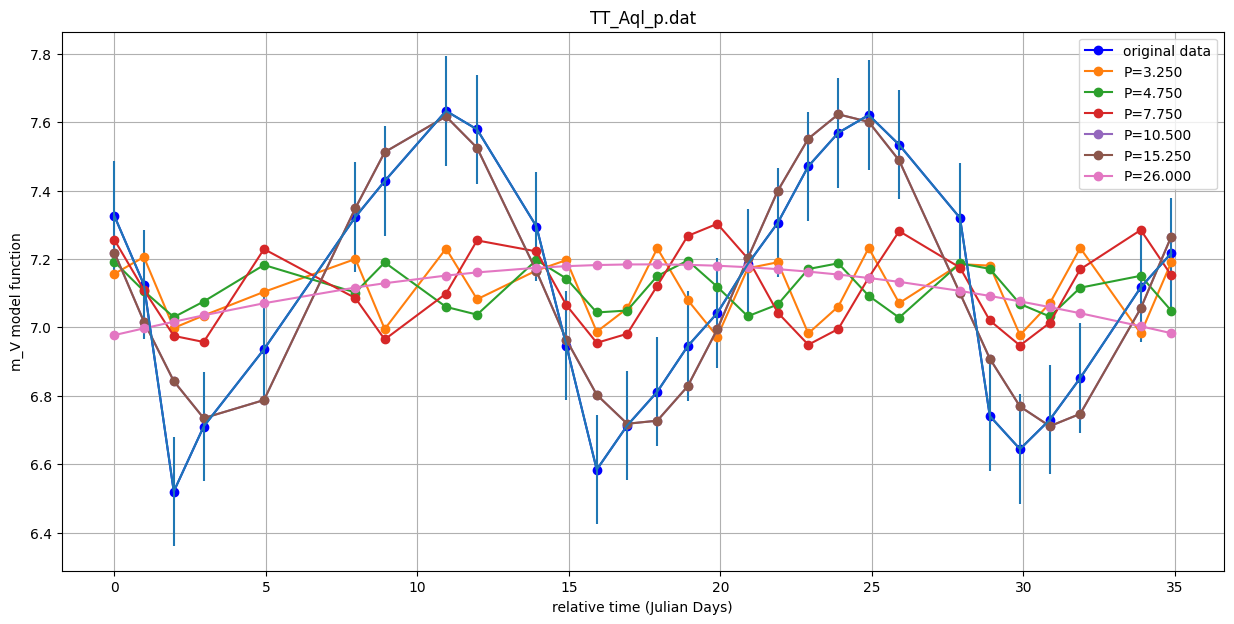

U_Aql_p.dat :
the period is 4.500 days
the chi square value for this period is 2.808
the period is 6.750 days
the chi square value for this period is 119.125
the period is 9.750 days
the chi square value for this period is 9.608
the period is 12.500 days
the chi square value for this period is 1.325
the period is 17.250 days
the chi square value for this period is 1.325
This is the best chi square value; 1.325, this the corresponding period; 12.5 this is the corresponding m_v; 6.430


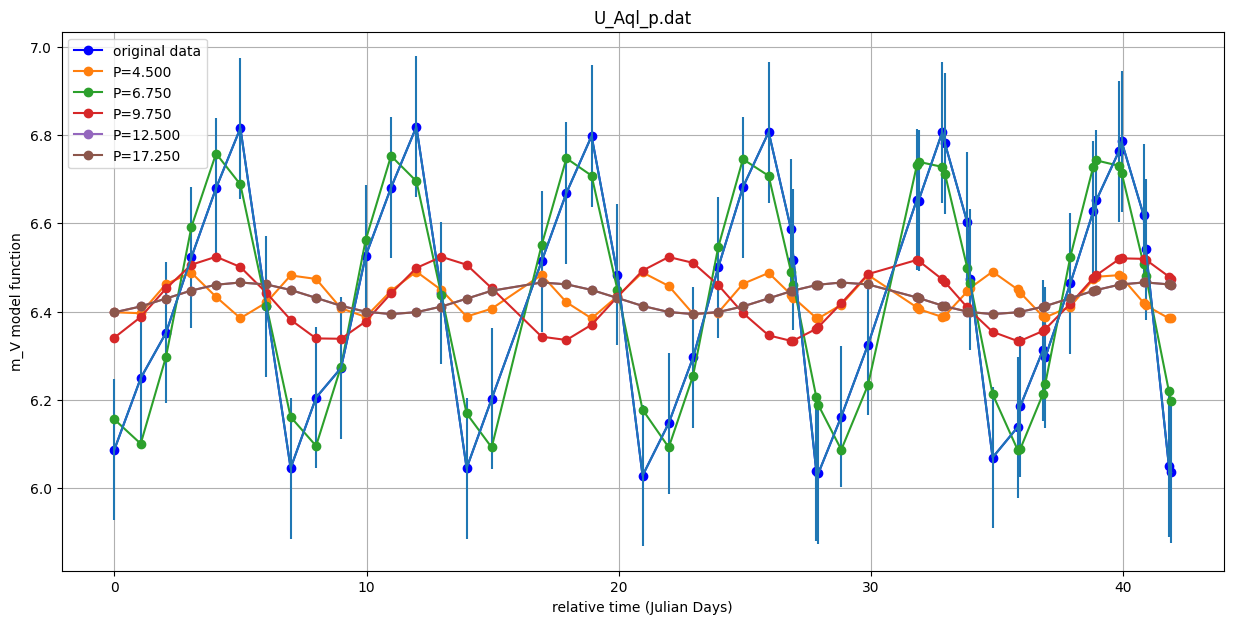

VW_Cas_p.dat :
the period is 3.500 days
the chi square value for this period is 0.403
the period is 4.750 days
the chi square value for this period is 4.446
the period is 6.500 days
the chi square value for this period is 54.366
the period is 8.250 days
the chi square value for this period is 10.626
the period is 11.000 days
the chi square value for this period is 10.626
the period is 24.750 days
the chi square value for this period is 14.777
This is the best chi square value; 0.403, this the corresponding period; 3.5 this is the corresponding m_v; 10.739


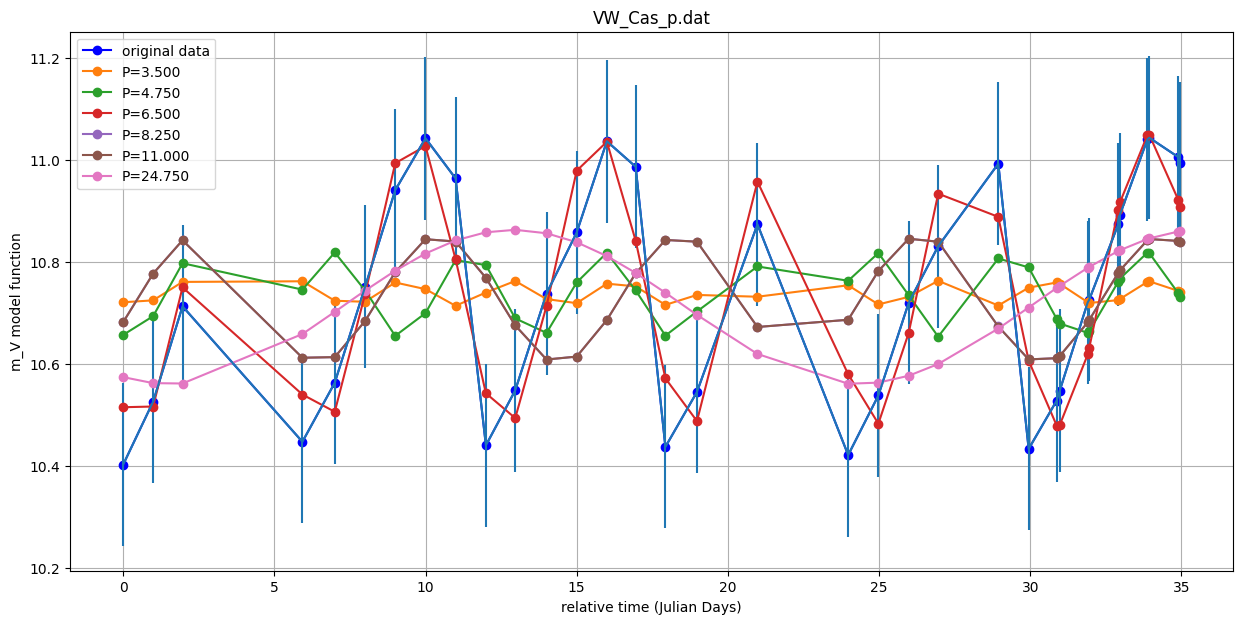

YZ_Aur_p.dat :
the period is 3.250 days
the chi square value for this period is 0.732
the period is 5.000 days
the chi square value for this period is 1.497
the period is 6.250 days
the chi square value for this period is 5.272
the period is 7.750 days
the chi square value for this period is 4.278
the period is 10.250 days
the chi square value for this period is 67.462
the period is 14.750 days
the chi square value for this period is 67.462
the period is 24.250 days
the chi square value for this period is 67.462
This is the best chi square value; 0.732, this the corresponding period; 3.25 this is the corresponding m_v; 10.382


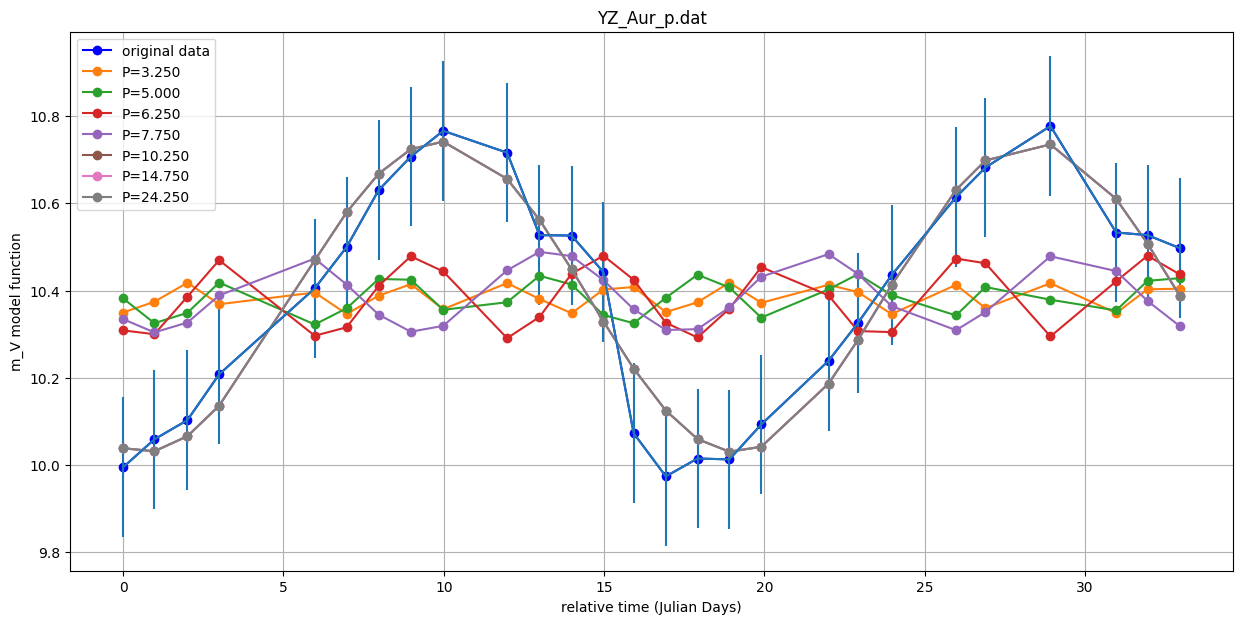

In [126]:
def func(clock,dellyv, moo, P, Phi):
    return moo + dellyv*np.sin((2*(np.pi)*clock)/(P) + Phi)
# defining a new general model function
def chie(mv, mmodel):
    ch = np.sum((mv - mmodel)**2/(0.16)**2)
    return ch

path ="data_files/"
# finds the files in directory path ending with ". dat "
file_list = [ f for f in sorted (os.listdir(path))
if f.endswith(".dat") ]
# loops over them

i = 0

for ff in file_list:
    filename = path + ff
    t , v_mag = np . loadtxt ( filename ,
    unpack = True , usecols =[0 ,1])
# calls on all the files
    realtive_time = t - t[0]
    mvo = np.mean(v_mag)
    delmv = (np.max(v_mag)-np.min(v_mag))/(2)
# calculate the power spectrum
    power = powerSpectrum( realtive_time , v_mag , periods )
    # finds the peak indices
    peak_indices , _ = find_peaks ( power , distance =5)
# converts the indices to periods
    peak_periods = periods [ peak_indices ]
    
    chs = []
    chisquarebest = 10000000
    x = 0
    
    print(ff, ':') 
    plt.figure(figsize=[15,7])
    plt.plot(realtive_time , v_mag ,'o-', color = 'blue', label = 'original data')
    plt.errorbar(realtive_time , v_mag, yerr = mverror)
    for item in peak_periods:
        params, pcovo = scipy.optimize.curve_fit(model, realtive_time, v_mag, p0 = [mvo, delmv, peak_periods.tolist()[x], 0], 
                                                absolute_sigma = False)
       
        plt.plot(realtive_time, model(realtive_time, params[0],params[1],params[2], params[3]),'o-', label = 
                 f'P={peak_periods.tolist()[x]:.3f}')
        plt.title(ff)
        plt.legend()
        plt.xlabel("relative time (Julian Days)")
        plt.ylabel("m_V model function")
        print(f'the period is {peak_periods.tolist()[x]:.3f} days')
        chs.append(chie(mvo, model(realtive_time, params[0],params[1],params[2],params[3])))
        print(f'the chi square value for this period is {chs[x]:.3f}')
        if chs[x] < chisquarebest:
            chisquarebest = chs[x]
            bestpeakp = peak_periods.tolist()[x]
            param_1 = params[1]
            perror = np.sqrt(np.diag(pcovo))
        x=x+1
        
       
    print(f'This is the best chi square value; {chisquarebest:.3f}, this the corresponding period;', bestpeakp, 
          f'this is the corresponding m_v; {param_1:.3f}')
    plt.grid()
    plt.show()
    
    T3.at[i, 'm_V'] = param_1
    T3.at[i, 'log_10(P)'] = np.log10(bestpeakp)
    T3.at[i, 'm_V Uncertainty'] = perror[0] 
    i=i+1

## Task 3 -  Determining the Period-Luminosity Relation

With the best mean $m_V$ obtained from Task 2, and using a rearranged value of the distance modulus, the mean $M_V$, can be found. 

\begin{align}
M_V = m_V - 5log_{10}\left(d\right) + 5
\end{align}
where; $d$ is the distance to each star (pc) found from Table 1.

Then with this $M_V$ it can be plotted against the best $log_{10}P$ and the gradient and y-intercept ($A$ and $B$) of the linear Period-Luminosity Law can be found. 

However, the equation for $M_V$ does not account for interstellar extinction. This is a phenomena caused by the scattering of light due to interstellar dust. This causes a reddening of the light that reaches Earth as blue light scatters easier than red light. Therefore by correcting this error we get more accurate data annd therefore a more accurate plot. With this the new distance formula for the corrected $M_V$;

\begin{align}
M_V = m_V - 5log_{10}\left(d\right) + 5 - A_V
\end{align}

where; $A_V$ is the extinction coefficient determined from; 

\begin{align}
A_V = 3.1 E_{B-V}
\end{align}
where; $E_{B-V}$ is the colour index given in Table 1.

Once these plots are determined the Period-Luminosity law can be discussed and analysed.


The following table is added onto throughout this task and the final table is present here.

In [127]:
T3

Cepheid  Distance (pc)  E_{B-V}        m_V  log_10(P)  m_V Uncertainty
0   AN Aur           3559    0.593  10.452047   0.511883         0.057282
1   CH Cas           3442    0.939  10.955387   0.698970         0.085963
2   ER Aur           8243    0.519  11.567030   0.511883         0.064665
3   FM Aql            890    0.646   8.310322   1.332438         0.070170
4   GV Aur           5188    0.581  12.066180   1.122216         0.099095
5   IN Aur           6562    0.948  13.843221   0.903090         0.073038
6   KK Cas           3461    0.992  11.933972   0.720159         0.051973
7   RS Cas           1406    0.875   9.947769   1.230449         0.092912
8   RX Aur           1652    0.276   7.638805   1.347330         0.067761
9   RY Cas           2828    0.649   9.959289   0.544068         0.074455
10  SW Cas           2008    0.494   9.775925   0.544068         0.077157
11  SY Aur           2277    0.454   9.090939   0.511883         0.075322
12  SY Cas           1905    0.464   9.961089   1.051153         0.066691
13  SZ Aql           1898    0.641   8.553482   0.602060         0.151708
14  TT Aql           1055    0.495   7.112868   0.676694         0.092512
15   U Aql            594    0.399   6.430142   1.096910         0.052480
16  VW Cas           3443    0.475  10.738525   0.544068         0.057119
17  YZ Aur           4876    0.565  10.382098   0.511883         0.074758

In [128]:
dist = T3['Distance (pc)']
Eb_v = T3['E_{B-V}']
mv = T3['m_V']
logP = T3['log_10(P)']

In [129]:
T3['M_V'] = mv - 5*np.log10(dist) +5
MV = T3['M_V']

Now, I will get the values for the corrected $M_V$ below;

In [136]:
T3['A_V'] = 3.1*Eb_v
AV = T3['A_V']

In [137]:
T3['M_V corrected'] = mv - AV + 5 - (5*np.log10(dist)) # here might be the problem
MVcorrected = T3['M_V corrected']

In [164]:
h = np.sort(MV)
g = np.argsort(logP)[::-1]
f= np.sort(MVcorrected)
e =(np.sort(logP))[::-1]

Now plotting data aquired above into a graph to prove the Period-Luminosity relation

In [165]:
def PLR(x, A, B):
    return A*(x) + B

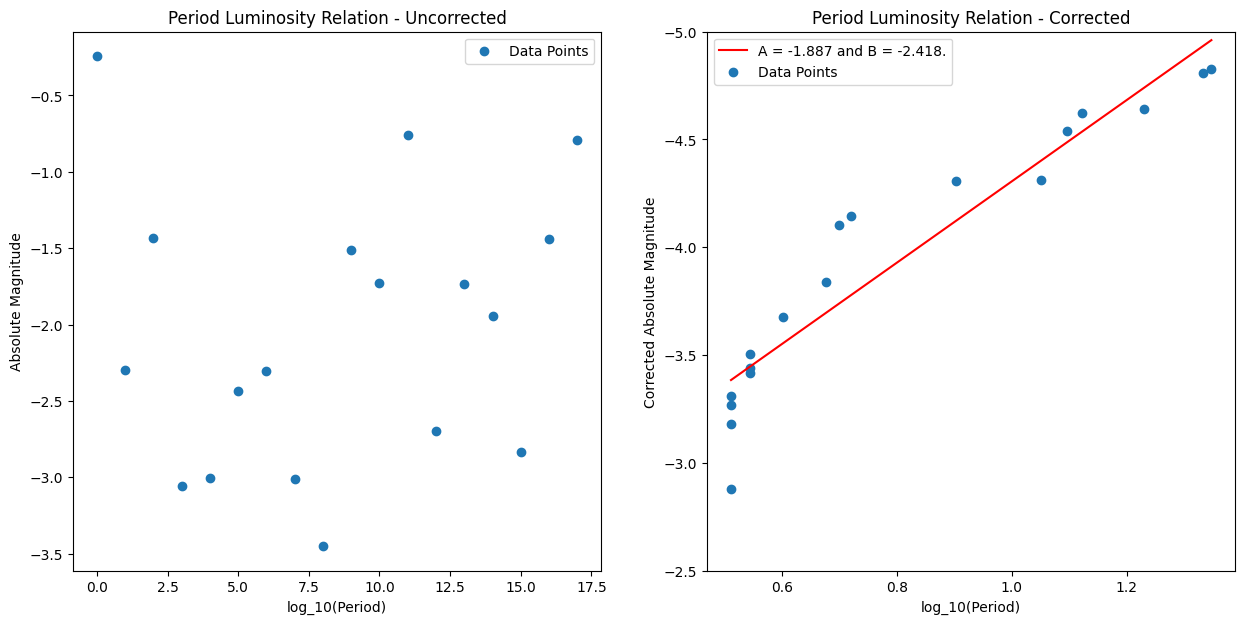

Here is the A and B values for the corrected data, A = -1.887 and B = -2.418.
Here is the A and B values for the uncorrected data, A = 0.021 and B = -2.220.


In [166]:
p, pc = curve_fit(PLR, g, h, p0 = [0,1])
ps, pcc = curve_fit(PLR, e, f, p0=[-2.5,1])

plt.figure(figsize=[15,7])
plt.subplot(121)
plt.scatter(g, h, label = 'Data Points')
plt.legend()
plt.title('Period Luminosity Relation - Uncorrected')
plt.xlabel("log_10(Period)")
plt.ylabel("Absolute Magnitude")

plt.subplot(122)
plt.plot(e, PLR(e, ps[0], ps[1]), 'red', label=f'A = {ps[0]:.3f} and B = {ps[1]:.3f}.')
plt.scatter(e, f, label = 'Data Points')
plt.legend()
plt.ylim(-2.5, -5)
plt.title('Period Luminosity Relation - Corrected')
plt.xlabel("log_10(Period)")
plt.ylabel("Corrected Absolute Magnitude")
plt.show()


print(f'Here is the A and B values for the corrected data, A = {ps[0]:.3f} and B = {ps[1]:.3f}.')
print(f'Here is the A and B values for the uncorrected data, A = {p[0]:.3f} and B = {p[1]:.3f}.')

Here is the A and B values for the uncorrected data, A = -2.633 and B = 0.077.
Here is the A and B values for the corrected data, A = -1.887 and B = -2.418.


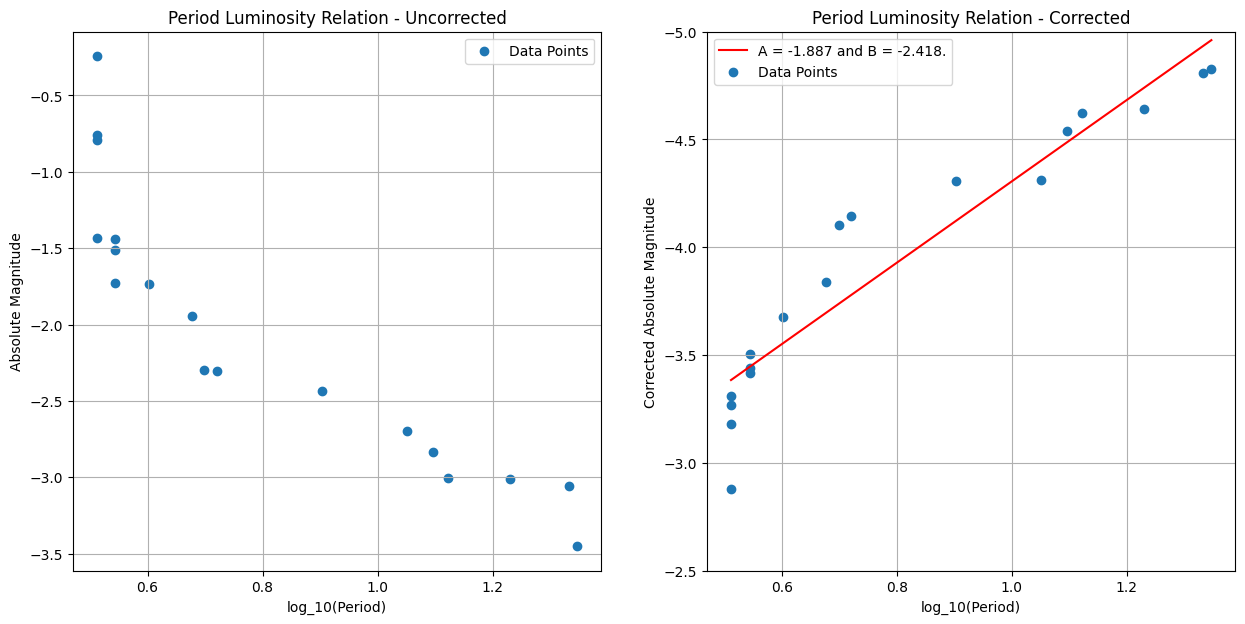

In [154]:
plt.figure(figsize=[15,7])
plt.subplot(121)
p, pc = curve_fit(PLR, logp_sort, MV_sort, p0 = [0,1])
#pcerror = np.sqrt(np.diag(pc))
plt.scatter(logp_sort, MV_sort, label = 'Data Points')
#plt.errorbar(g, h, yerr = pcerror[0], fmt='o')
plt.legend()

plt.title('Period Luminosity Relation - Uncorrected')
plt.xlabel("log_10(Period)")
plt.ylabel("Absolute Magnitude")
plt.grid()
print(f'Here is the A and B values for the uncorrected data, A = {p[0]:.3f} and B = {p[1]:.3f}.')

plt.subplot(122)
ps, pcc = curve_fit(PLR, logp_sort, MVC_sort, p0=[-2.5,1])
plt.plot(logp_sort, PLR(logp_sort, ps[0], ps[1]), 'red', label=f'A = {ps[0]:.3f} and B = {ps[1]:.3f}.')
#pccerror = np.sqrt(np.diag(pcc))
plt.scatter(logp_sort, MVC_sort, label = 'Data Points')
#plt.errorbar(e, f, yerr = pccerror[0], fmt='o')
plt.legend()
plt.ylim(-2.5, -5)
plt.title('Period Luminosity Relation - Corrected')
plt.xlabel("log_10(Period)")
plt.ylabel("Corrected Absolute Magnitude")
plt.grid()
print(f'Here is the A and B values for the corrected data, A = {ps[0]:.3f} and B = {ps[1]:.3f}.')

plt.show()

Since the uncorrected data follows absolutely no trend there is no reason to put a line of best fit on the graph. However, I will still extract the $A$ and $B$ value because I will use it to compare to the corrected data.

The Period-Luminosity Law of the uncorrected data is; 

\begin{align}
\bar{M_V} = -0.587 log_{10}\left(P\right) -1.482
\end{align}

and the Period-Luminosity Law for the corrected data is; 

\begin{align}
\bar{M_V} = -2.911 log_{10}\left(P\right) -1.199
\end{align}


## Conclusion

Based on the results of the final task we were able to determine that the Period-Luminosity Law of the uncorrected data is; 

\begin{align}
\bar{M_V} = -0.587 log_{10}P -1.482
\end{align}

and the Period-Luminosity Law for the corrected data is; 

\begin{align}
\bar{M_V} = -2.911 log_{10}P -1.199
\end{align}

From just observing the graphs from Task 3 the difference between the errors on the uncorrected plot compared to the corrected plot is massive. The corrected plot has much smaller errors, this is to be expected as it is a more accurate data set, having been corrected for extinction In addition to this the data, with errors, falls on, or near, the line of best fit. This then proves a linear relationship between corrected $M_V$ and $log_{10}P$.

Overall this lab went well, I would consifer the only hiccup getting the correct periods to be the highest, instead of the lowest, $\chi^2$ value. As stated before I am unsure on what has caused this but for the purpose of the lab it is not a big issue as the correct period is still able to be gotten. Nevertheless it is, in a theoretical stance, the opposite of what I should get. 

I will say, having done this lab I have greatly improved my Python skills having dealt with a range of coding problems, which has been great experience.